# Introduction

### Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the top business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

# Problem Statement

The telecom company in Southeast Asia is facing an increase in customer churn and wants to reduce the loss of high-value customers. They aim to predict churn in the ninth month using data from the previous three months. The company plans to analyze various factors such as demographics, usage patterns, service quality, and complaints to identify variables that affect churn. They will focus on high-value customers and build machine learning models for churn prediction. These models will help predict churn likelihood and identify important variables to address underlying issues and improve customer satisfaction.

These models will serve two purposes.

*   First, they will predict whether a high-value customer is likely to churn in
the near future. By gaining insights into this aspect, the company can take proactive steps such as offering special plans, discounts, or personalized offers to retain these customers.
*   Second, the models will identify important variables that strongly predict churn. These variables will shed light on why customers choose to switch to other networks, enabling the company to address underlying issues and improve customer satisfaction.





# Tasks Involved

**Task 1: Import libraries and load the dataset**

**Task 2: Understand and explore the data**
*   Analyze different feature types in the data
*   Handle missing values by imputation
*   Identify the relevant data required for the problem

**Task 3: Conduct feature engineering**
*   Extract new relevant features from the data set
*   Filter high-value customers
*   Derive the target variable “churn” based on the existing features

**Task 4: Visualize the data**
*   Analyze the data to extract relevant insights through informative visualizations
*   Look for any outliers and treat them

**Task 5: Modeling**
*   Divide the data into train-test splits
*   Handle class imbalance
*   Build different machine learning models and evaluate their performance
*   Tune the hyperparameters to optimize the performance for the best model
*   Train and evaluate a neural network model with the optimal combination of hyperparameters

**Task 6: Business insights and recommendations**
*   Understand the profitability of the telecommunication service program, and estimate the impact of your model using misclassification costs
*   Propose a solution to leverage customer interaction/feedback data and predict those who are highly likely to churn

# Task 1: Importing the required libraries and loading the data set

**Description**


In this task, you will load all the methods and packages required to perform the various tasks in this capstone project.

First, import the required packages and modules.

In [201]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

Mount Google Drive to your VM.

In [202]:
# Import the required library to mount Google Drive
#from google.colab import drive

# Mount your Google Drive to the Colab notebook
#drive.mount('/content/drive', force_remount=True)

Import the training data

In [203]:
# Read the training data from a CSV file stored in your Google Drive
#churn = pd.read_csv('/content/drive/MyDrive/Capstone Project/telecom_churn_data.csv')

In [204]:
# read the data by uploading data file in content driver in google colab.
churn = pd.read_csv("/content/telecom_churn_data.csv")

Checklist:


*   Imported the required packages
*   Mounted your Google Drive to access the data
*   Imported the data


# Task 2: Understanding and exploring the data

### Description

In this task, you will explore the data that you have just loaded.

In [205]:
# look at initial rows of the data
churn.head(10)

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0        109             0.0             0.0             0.0   
1        109             0.0             0.0             0.0   
2        109             0.0             0.0             0.0   
3        109             0.0             0.0             0.0   
4        109             0.0             0.0             0.0   
5        109             0.0             0.0             0.0   
6        109             0.0             0.0             0.0   
7        109             0.0             0.0             0.0   
8        109             0.0             0.0             0.0   
9        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   
6            6/30/2014            7/31/2014            8/31/2014   
7            6/30/2014            7/31/2014            8/31/2014   
8            6/30/2014            7/31/2014            8/31/2014   
9            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100          NaN   
1            9/30/2014    34.047   355.074   268.321   86.285        24.11   
2            9/30/2014   167.690   189.058   210.226  290.714        11.54   
3            9/30/2014   221.338   251.102   508.054  389.500        99.91   
4            9/30/2014   261.636   309.876   238.174  163.426        50.31   
5            9/30/2014    50.258    58.810    83.386  170.826        50.16   
6            9/30/2014   429.023   190.704   255.114  114.751        71.03   
7            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8            9/30/2014   378.721   492.223   137.362  166.787       413.69   
9            9/30/2014   119.518   247.435   170.231  160.042        33.89   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   
5        43.63        85.48       138.79         19.28         13.44   
6        45.03        76.66        15.23        262.73         49.24   
7        54.68        52.29          NaN        453.43        567.16   
8       351.03        35.08        33.46         94.66         80.63   
9        30.11        22.43        27.84         63.48         54.16   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   
5         14.46         46.91           0.00           0.00           0.00   
6         92.08         50.33           0.00           0.00           0.00   
7        325.91           NaN          16.23          33.49          31.64   
8        136.48        108.71           0.00           0.00           0.00   
9         78.34        123.48           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_

### Data Description

There are several types of data that is collected from customers by a telecomminucation service provider. Some of the information that you have to look for data analysis and EDA is given below:
- Recharging of the service: There are several variables that describe the duration, maximum, total amount and average of the recharge price of the service they avail, which include the 2G service, the 3G service, internet packages and call services
  - av_rech_amt_data: Average recharge data amount
  - count_rech_2g: Count of 2G recharges by the customer
  - count_rech_3g: Count of 3G recharges by the customer
  - max_rech_data: Maximum recharge for mobile internet
  - total_rech_data: Total recharge for mobile internet
  - max_rech_amt: Maximum recharge amount
  - total_rech_amt: Total recharge amount
  - total_rech_num: Total number of times customer recharged

- Call and Internet service: They specify the amount of calls, type of calling service used (STD, ISD, Roaming), type of internet service and amount of internet usage over a specific period of time
  - total_calls_mou: Total minutes of voice calls
  - total_internet_mb: Total amount of internet usage in MB
  - arpu: Average revenue per user
  - onnet_mou: The minutes of usage for all kind of calls within the same operator network
  - offnet_mou: The minutes of usage for all kind of calls outside the operator T network
  - Minutes of usage for outgoing calls for each type of call service:
    - loc_og_mou
    - std_og_mou
    - isd_og_mou
    - spl_og_mou
    - roam_og_mou
    - total_og_mou
  - Minutes of usage for incoming calls for each type of call service:
    - loc_ic_mou
    - std_ic_mou
    - isd_ic_mou
    - spl_ic_mou
    - roam_ic_mou
    - total_ic_mou
  - total_rech_num: Total number of recharge
  - total_rech_amt: Total amount of recharge
  - max_rech_amt: Maximum recharge amount
  - total_rech_data: Total recharge for mobile internet
  - max_rech_data: Maximum recharge for mobile internet
  - av_rech_amt_data: Average recharge amount for mobile internet
  - vol_2g_mb: Mobile internet usage volumn for 2G
  - vol_3g_mb: Mobile internet usage volumn for 3G


The categorical variables present in the data set are given below:
  - night_pck_user: Prepaid service schemes for use during specific night hours only
  - fb_user: Service scheme to avail services of Facebook and similar social networking sites



Most of the variables have their values recorded for 4 different months. The variable names end with the month number as explained below:
- *.6: KPI for the month of June
- *.7: KPI for the month of July
- *.8: KPI for the month of August
- *.9: KPI for the month of September

The rest of variables have been defined in the detailed data description.

Print information about the dataframe

In [206]:
# summary of different feature types
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 225 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    circle_id                 int64  
 1    loc_og_t2o_mou            float64
 2    std_og_t2o_mou            float64
 3    loc_ic_t2o_mou            float64
 4    last_date_of_month_6      object 
 5    last_date_of_month_7      object 
 6    last_date_of_month_8      object 
 7    last_date_of_month_9      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   arpu_9                    float64
 12   onnet_mou_6               float64
 13   onnet_mou_7               float64
 14   onnet_mou_8               float64
 15   onnet_mou_9               float64
 16   offnet_mou_6              float64
 17   offnet_mou_7              float64
 18   offnet_mou_8              float64
 19   offnet_mou_9              float64
 20   roam

Display the summary statistics for the data set

In [207]:
# analysis of data statistics
churn.describe(include='all')

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
count     99999.0         98981.0         98981.0         98981.0   
unique        NaN             NaN             NaN             NaN   
top           NaN             NaN             NaN             NaN   
freq          NaN             NaN             NaN             NaN   
mean        109.0             0.0             0.0             0.0   
std           0.0             0.0             0.0             0.0   
min         109.0             0.0             0.0             0.0   
25%         109.0             0.0             0.0             0.0   
50%         109.0             0.0             0.0             0.0   
75%         109.0             0.0             0.0             0.0   
max         109.0             0.0             0.0             0.0   

       last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
count                 99999                99398                98899   
unique                    1                    1                    1   
top               6/30/2014            7/31/2014            8/31/2014   
freq                  99999                99398                98899   
mean                    NaN                  NaN                  NaN   
std                     NaN                  NaN                  NaN   
min                     NaN                  NaN                  NaN   
25%                     NaN                  NaN                  NaN   
50%                     NaN                  NaN                  NaN   
75%                     NaN                  NaN                  NaN   
max                     NaN                  NaN                  NaN   

       last_date_of_month_9        arpu_6        arpu_7        arpu_8  \
count                 98340  99999.000000  99999.000000  99999.000000   
unique                    1           NaN           NaN           NaN   
top               9/30/2014           NaN           NaN           NaN   
freq                  98340           NaN           NaN           NaN   
mean                    NaN    282.987358    278.536648    279.154731   
std                     NaN    328.439770    338.156291    344.474791   
min                     NaN  -2258.709000  -2014.045000   -945.808000   
25%                     NaN     93.411500     86.980500     84.126000   
50%                     NaN    197.704000    191.640000    192.080000   
75%                     NaN    371.060000    365.344500    369.370500   
max                     NaN  27731.088000  35145.834000  33543.624000   

              arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  \
count   99999.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      261.645069    132.395875    133.670805    133.018098    130.302327   
std       341.998630    297.207406    308.794148    308.951589    308.477668   
min     -1899.505000      0.000000      0.000000      0.000000      0.000000   
25%        62.685000      7.380000      6.660000      6.460000      5.330000   
50%       176.849000     34.310000     32.330000     32.360000     29.840000   
75%       353.466500    118.740000    115.595000    115.860000    112.130000   
max     38805.617000   7376.710000   8157.780000  10752.560000  10427.460000   

        offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
count   96062.000000  96140.000000  94621.000000  92254.000000   96062.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean      197.935577    197.045133    196.574803    190.337

Create a copy of the original data

In [208]:
# create backup of data
original = churn.copy()

Analyze the different types of features present in the data set

In [209]:
# create column name list by types of columns
id_cols = ['circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]


# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])

#ID cols: 1
#Date cols:12
#Numeric cols:204
#Category cols:8
True


# Handling missing values

### Details on Missing Values

There are several types of features present in this data set. Some of the information that you have to look for missing value treatment is given below:


*   If there are missing values in the columns corresponding to 'Recharging of the service' variables, this is because the customer did not recharge that month.


*   If the columns corresponding to 'Call and Internet service' variables that have more than 70% of missing values, you can drop those variables from the data set. If not, then you can use the MICE technique to impute the values in those missing entries.


*   If there are missing values in the categorical variables, this means that there is another scheme that the customer has availed from the telecomminucation service.

Find the ratio of missing values in each column in the data set

In [210]:
# look at missing value ratio in each column

churn.isnull().sum()*100/churn.shape[0]

circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2t_mou_9             7.745077
loc_og_t2m_mou_6             3.937039
loc_og_t2m_mou_7             3.859039
loc_og_t2m_mou_8             5.378054
loc_og_t2m_mou_9             7.745077
loc_og_t2f_mou_6             3.937039
loc_og_t2f_mou_7             3.859039
loc_og_t2f_mou_8             5.378054
loc_og_t2f_mou_9             7.745077
loc_og_t2c_mou_6             3.937039
loc_og_t2c_mou_7             3.859039
loc_og_t2c_mou_8             5.378054
loc_og_t2c_mou_9             7.745077
loc_og_mou_6                 3.937039
loc_og_mou_7                 3.859039
loc_og_mou_8                 5.378054
loc_og_mou_9                 7.745077
std_og_t2t_mou_6             3.937039
std_og_t2t_mou_7             3.859039
std_og_t2t_mou_8             5.378054
std_og_t2t_mou_9             7.745077
std_og_t2m_mou_6             3.937039
std_og_t2m_mou_7             3.859039
std_og_t2m_mou_8             5.378054
std_og_t2m_mou_9             7.745077
std_og_t2f_mou_6             3.937039
std_og_t2f_mou_7             3.859039
std_og_t2f_mou_8             5.378054
std_og_t2f_mou_9             7.745077
std_og_t2c_mou_6             3.937039
std_og_t2c_mou_7             3.859039
std_og_t2c_mou_8             5.378054
std_og_t2c_mou_9             7.745077
std_og_mou_6                 3.937039
std_og_mou_7                 3.859039
std_og_mou_8                 5.378054
std_og_mou_9                 7.745077
isd_og_mou_6                 3.937039
isd_og_mou_7                 3.859039
isd_og_mou_8                 5.378054
isd_og_mou_9                 7.745077
spl_og_mou_6                 3.937039
spl_og_mou_7                 3.859039
spl_og_mou_8                 5.378054
spl_og_mou_9                 7.745077
og_others_6                  3.937039
og_others_7                  3.859039
og_others_8                  5.378054
og_others_9                  7.745077
total_og_mou_6               0.000000
total_og_mou_7               0.000000
total_og_mou_8               0.000000
total_og_mou_9               0.000000
loc_ic_t2t_mou_6             3.937039
loc_ic_t2t_mou_7             3.859039
loc_ic_t2t_mou_8             5.378054
loc_ic_t2t_mou_9             7.745077
loc_ic_t2m_mou_6             3.937039
loc_ic_t2m_mou_7             3.859039
loc_ic_t2m_mou_8             5.378054
loc_ic_t2m_mou_9             7.745077
loc_ic_t2f_mou_6             3.937039
loc_ic_t2f_mou_7             3.859039
loc_ic_t2f_mou_8             5.378054
loc_ic_t2f_mou_9             7.745077
loc_ic_mou_6                 3.937039
loc_ic_mou_7                 3.859039
loc_ic_mou_8                 5.378054
loc_ic_mou_9                 7.745077
std_ic_t2t_mou_6             3.937039
std_ic_t2t_mou_7             3.859039
std_ic_t2t_mou_8             5.378054
std_ic_t2t_mou_9             7.745077
std_ic_t2m_mou_6             3.937039
std_ic_t2m

In [211]:
# Below is the number of features with more than 70% missing values
(churn.isnull().sum()*100/churn.shape[0]>=70).sum()

40

**Checkpoint:** You must have observed that there are 40 features with more than 70% of the missing values.

### i) Impute missing values with zeroes

Now that we have the information about the amount of missing values in each column, we can go ahead and perform some imputing and deleting.

First, we will start with the columns corresponding to the "recharging of the service" information.

In [212]:
# Display summary statistics for the recharge columns
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

churn[recharge_cols].describe(include='all')

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170         1.864668         2.044699         2.016288   
std             2.516339         2.570254         2.768332         2.720132   
min             1.000000         0.000000         0.000000         0.000000   
25%             1.000000         1.000000         1.000000         1.000000   
50%             2.000000         1.000000         1.000000         1.000000   
75%             3.000000         2.000000         2.000000         2.000000   
max            84.000000        42.000000        48.000000        44.000000   

       count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          1.781807         0.599133         0.621720         0.635711   
std           2.214701         1.274428         1.394524         1.422827   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         0.000000         0.000000         0.000000   
50%           1.000000         0.000000         0.000000         0.000000   
75%           2.000000         1.000000         1.000000         1.000000   
max          40.000000        29.000000        35.000000        45.000000   

       count_rech_3g_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          0.659363       126.393392       126.729459       125.717301   
std           1.411513       108.477235       109.765267       109.437851   
min           0.000000         1.000000         1.000000         1.000000   
25%           0.000000        25.000000        25.000000        25.000000   
50%           0.000000       145.000000       145.000000       145.000000   
75%           1.000000       177.000000       177.000000       179.000000   
max          49.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count      25922.00000        25153.000000        25571.000000   
mean         124.94144          192.600982          200.981292   
std          111.36376          192.646318          196.791224   
min            1.00000            1.000000            0.500000   
25%           25.00000           82.000000           92.000000   
50%          145.00000          154.000000          154.000000   
75%          179.00000          252.000000          252.000000   
max         1555.00000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9  
count        26339.000000        25922.000000  
mean           197.526489          192.734315  
std            191.301305          188.400286  
min              0.500000            1.000000  
25%             87.000000           69.000000  
50%            154.000000          164.000000  
75%            252.000000          252.000000  
max           4076.000000         4061.000000

Observe whether the date of the last recharge and the total recharge data value are missing together

In [213]:
# You can do this by displaying the rows that have null values in these two variables

# Identify rows where both 'total_rech_data_6' and 'date_of_last_rech_data_6' are null
No_recharge = churn[churn['total_rech_data_6'].isnull() & churn['date_of_last_rech_data_6'].isnull()][['total_rech_data_6', 'date_of_last_rech_data_6']]

# Display the first 20 rows
print(No_recharge.head(20))

# Display the shape of the resulting DataFrame
print(No_recharge.shape)


    total_rech_data_6 date_of_last_rech_data_6
1                 NaN                      NaN
2                 NaN                      NaN
3                 NaN                      NaN
5                 NaN                      NaN
6                 NaN                      NaN
7                 NaN                      NaN
8                 NaN                      NaN
9                 NaN                      NaN
10                NaN                      NaN
11                NaN                      NaN
12                NaN                      NaN
13                NaN                      NaN
14                NaN                      NaN
15                NaN                      NaN
16                NaN                      NaN
17                NaN                      NaN
18                NaN                      NaN
20                NaN                      NaN
21                NaN                      NaN
22                NaN                      NaN
(74846, 2)


Impute missing values with zeroes wherever customer didn't recharge their number that month.

In [214]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [215]:
# impute missing values with 0 for the above mentioned list of recharge columns

churn[zero_impute] = churn[zero_impute].apply(lambda x: x.fillna(0))



Check whether the imputation has been done correctly

In [216]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(churn[zero_impute].isnull().sum()*100/churn.shape[1])

# summary
print("\n\nSummary statistics\n")
print(churn[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_

Drop the id and date columns which are not required in further analyses

In [217]:
# drop id and all the date columns
print("Shape before dropping: ", churn.shape)

churn = churn.drop(id_cols + date_cols, axis=1)

print("Shape after dropping: ", churn.shape)

Shape before dropping:  (99999, 225)
Shape after dropping:  (99999, 212)


### ii) Replace NaN values in categorical variables

The categorical variables present in the data set are given below:
  - night_pck_user: Prepaid service schemes for use during specific night hours only
  - fb_user: Service scheme to avail services of Facebook and similar social networking sites

If there are missing values, this means that there is another scheme that the customer has availed from the telecomminucation service.

We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [218]:
# replace missing values with '-1' in categorical columns

churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1))



Check for the missing value ratio

In [219]:
# missing value ratio
print("Missing value ratio:\n")
print(churn[cat_cols].isnull().sum()*100/churn.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


### iii) Drop variables with more than a given threshold of missing values

Here, we will be removing the column variables that have more than 70% of its elements missing.

In [220]:
churn.shape[1]
churn.shape[0]

212

99999

In [221]:
initial_cols = churn.shape[1]

# Insert the threshold value of missing entries
MISSING_THRESHOLD = 0.7

# Extract a list of columns that have less than the threshold of missing values
include_cols = list(churn.apply(lambda column: True if column.isnull().sum()/churn.shape[0] < MISSING_THRESHOLD else False))

# Extract a list of columns that have more


In [222]:
# Include the columns extracted in the above list in the main data set
# These columns will have the percentage of missing values less than the threshold

drop_missing = pd.DataFrame({'features':churn.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]



# Display the number of columns dropped

churn = churn.loc[:, include_cols]

dropped_cols = churn.shape[1] - initial_cols

print("{0} columns dropped.".format(dropped_cols))

features  include
0        loc_og_t2o_mou     True
1        std_og_t2o_mou     True
2        loc_ic_t2o_mou     True
3                arpu_6     True
4                arpu_7     True
5                arpu_8     True
6                arpu_9     True
7           onnet_mou_6     True
8           onnet_mou_7     True
9           onnet_mou_8     True
10          onnet_mou_9     True
11         offnet_mou_6     True
12         offnet_mou_7     True
13         offnet_mou_8     True
14         offnet_mou_9     True
15        roam_ic_mou_6     True
16        roam_ic_mou_7     True
17        roam_ic_mou_8     True
18        roam_ic_mou_9     True
19        roam_og_mou_6     True
20        roam_og_mou_7     True
21        roam_og_mou_8     True
22        roam_og_mou_9     True
23     loc_og_t2t_mou_6     True
24     loc_og_t2t_mou_7     True
25     loc_og_t2t_mou_8     True
26     loc_og_t2t_mou_9     True
27     loc_og_t2m_mou_6     True
28     loc_og_t2m_mou_7     True
29     loc_og_t2m_mou_8     True
30     loc_og_t2m_mou_9     True
31     loc_og_t2f_mou_6     True
32     loc_og_t2f_mou_7     True
33     loc_og_t2f_mou_8     True
34     loc_og_t2f_mou_9     True
35     loc_og_t2c_mou_6     True
36     loc_og_t2c_mou_7     True
37     loc_og_t2c_mou_8     True
38     loc_og_t2c_mou_9     True
39         loc_og_mou_6     True
40         loc_og_mou_7     True
41         loc_og_mou_8     True
42         loc_og_mou_9     True
43     std_og_t2t_mou_6     True
44     std_og_t2t_mou_7     True
45     std_og_t2t_mou_8     True
46     std_og_t2t_mou_9     True
47     std_og_t2m_mou_6     True
48     std_og_t2m_mou_7     True
49     std_og_t2m_mou_8     True
50     std_og_t2m_mou_9     True
51     std_og_t2f_mou_6     True
52     std_og_t2f_mou_7     True
53     std_og_t2f_mou_8     True
54     std_og_t2f_mou_9     True
55     std_og_t2c_mou_6     True
56     std_og_t2c_mou_7     True
57     std_og_t2c_mou_8     True
58     std_og_t2c_mou_9     True
59         std_og_mou_6     True
60         std_og_mou_7     True
61         std_og_mou_8     True
62         std_og_mou_9     True
63         isd_og_mou_6     True
64         isd_og_mou_7     True
65         isd_og_mou_8     True
66         isd_og_mou_9     True
67         spl_og_mou_6     True
68         spl_og_mou_7     True
69         spl_og_mou_8     True
70         spl_og_mou_9     True
71          og_others_6     True
72          og_others_7     True
73          og_others_8     True
74          og_others_9     True
75       total_og_mou_6     True
76       total_og_mou_7     True
77       total_og_mou_8     True
78       total_og_mou_9     True
79     loc_ic_t2t_mou_6     True
80     loc_ic_t2t_mou_7     True
81     loc_ic_t2t_mou_8     True
82     loc_ic_t2t_mou_9     True
83     loc_ic_t2m_mou_6     True
84     loc_ic_t2m_mou_7     True
85     loc_ic_t2m_mou_8     True
86     loc_ic_t2m_mou_9     True
87     loc_ic_t2f_mou_6     True
88     loc_ic_t2f_mou_7     True
89     loc_ic_t2f_mou_8     True
90     loc_ic_t2f_mou_9     True
91         loc_ic_mou_6     True
92         loc_ic_mou_7     True
93         loc_ic_mou_8     True
94         loc_ic_mou_9     True
95     std_ic_t2t_mou_6     True
96     std_ic_t2t_mou_7     True
97     std_ic_t2t_mou_8     True
98     std_ic_t2t_mou_9     True
99     std_ic_t2m_mou_6     True
100    std_ic_t2m_mou_7     True
101    std_ic_t2m_mou_8     True
102    std_ic_t2m_mou_9     True
103    std_ic_t2f_mou_6     True
104    std_ic_t2f_mou_7     True
105    std_ic_t2f_mou_8     True
106    std_ic_t2f_mou_9     True
107    std_ic_t2o_mou_6     True
108    std_ic_t2o_mou_7     True
109    std_ic_t2o_mou_8     True
110    std_ic_t2o_mou_9     True
111        std_ic_mou_6     True
112        std_ic_mou_7     True
113        std_ic_mou_8     True
114        std_ic_mou_9     True
115      total_ic_mou_6     True
116      total_ic_mou_7     True
117      total_ic_mou_8     True
118      total_ic_mou_9     True
119        spl_ic_mou_6     True
120        spl_ic_mou_

-16 columns dropped.


**Checkpoint:** You must have dropped 16 columns in the above step

In [223]:
# look at missing value ratio in each column
churn.isnull().sum()*100/churn.shape[0]

loc_og_t2o_mou        1.018010
std_og_t2o_mou        1.018010
loc_ic_t2o_mou        1.018010
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t2f_mou_7      3.859039
loc_og_t2f_mou_8      5.378054
loc_og_t2f_mou_9      7.745077
loc_og_t2c_mou_6      3.937039
loc_og_t2c_mou_7      3.859039
loc_og_t2c_mou_8      5.378054
loc_og_t2c_mou_9      7.745077
loc_og_mou_6          3.937039
loc_og_mou_7          3.859039
loc_og_mou_8          5.378054
loc_og_mou_9          7.745077
std_og_t2t_mou_6      3.937039
std_og_t2t_mou_7      3.859039
std_og_t2t_mou_8      5.378054
std_og_t2t_mou_9      7.745077
std_og_t2m_mou_6      3.937039
std_og_t2m_mou_7      3.859039
std_og_t2m_mou_8      5.378054
std_og_t2m_mou_9      7.745077
std_og_t2f_mou_6      3.937039
std_og_t2f_mou_7      3.859039
std_og_t2f_mou_8      5.378054
std_og_t2f_mou_9      7.745077
std_og_t2c_mou_6      3.937039
std_og_t2c_mou_7      3.859039
std_og_t2c_mou_8      5.378054
std_og_t2c_mou_9      7.745077
std_og_mou_6          3.937039
std_og_mou_7          3.859039
std_og_mou_8          5.378054
std_og_mou_9          7.745077
isd_og_mou_6          3.937039
isd_og_mou_7          3.859039
isd_og_mou_8          5.378054
isd_og_mou_9          7.745077
spl_og_mou_6          3.937039
spl_og_mou_7          3.859039
spl_og_mou_8          5.378054
spl_og_mou_9          7.745077
og_others_6           3.937039
og_others_7           3.859039
og_others_8           5.378054
og_others_9           7.745077
total_og_mou_6        0.000000
total_og_mou_7        0.000000
total_og_mou_8        0.000000
total_og_mou_9        0.000000
loc_ic_t2t_mou_6      3.937039
loc_ic_t2t_mou_7      3.859039
loc_ic_t2t_mou_8      5.378054
loc_ic_t2t_mou_9      7.745077
loc_ic_t2m_mou_6      3.937039
loc_ic_t2m_mou_7      3.859039
loc_ic_t2m_mou_8      5.378054
loc_ic_t2m_mou_9      7.745077
loc_ic_t2f_mou_6      3.937039
loc_ic_t2f_mou_7      3.859039
loc_ic_t2f_mou_8      5.378054
loc_ic_t2f_mou_9      7.745077
loc_ic_mou_6          3.937039
loc_ic_mou_7          3.859039
loc_ic_mou_8          5.378054
loc_ic_mou_9          7.745077
std_ic_t2t_mou_6      3.937039
std_ic_t2t_mou_7      3.859039
std_ic_t2t_mou_8      5.378054
std_ic_t2t_mou_9      7.745077
std_ic_t2m_mou_6      3.937039
std_ic_t2m_mou_7      3.859039
std_ic_t2m_mou_8      5.378054
std_ic_t2m_mou_9      7.745077
std_ic_t2f_mou_6      3.937039
std_ic_t2f_mou_7      3.859039
std_ic_t2f_mou_8      5.378054
std_ic_t2f_mou_9      7.745077
std_ic_t2o_mou_6      3.937039
std_ic_t2o_mou_7      3.859039
std_ic_t2o_mou_8      5.378054
std_ic_t2o_mou_9      7.745077
std_ic_mou_6          3.937039
std_ic_mou_7          3.859039
std_ic_mou_8          5.378054
std_ic_mou_9          7.745077
total_ic_mou_6        0.000000
total_ic_mou_7        0.000000
total_ic_mou_8        0.000000
total_ic_mou_9        0.000000
spl_ic_mou_6          3.937039
spl_ic_mou_7          3.859039
spl_ic_mou_8          5.378054
spl_ic_mou_9          7.745077
isd_ic_mou_6          3.937039
isd_ic_mou_7          3.859039
isd_ic_mou_8          5.378054
isd_ic_mou_9          7.745077
ic_others_6           3.937039
ic_others_7           3.859039
i

### iv) Impute missing values using MICE

[MICE](https://scikit-learn.org/stable/modules/impute.html) is called "Multiple Imputation by Chained Equation". It uses machine learning techniques in order to see what are the trends in the values of that column. Using this information, it will smartly fill in the missing values in that column.

MICE is now called Iterative Imputer.

You can specify the machine learning algorithm to be used in order to fill in the missing values of that column.

In [224]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

So, we will be using linear regression for filling the missing values in the rest of the numeric columns.

In [225]:
churn_cols = churn.columns

# using MICE technique to impute missing values in the rest of the columns
lr = LinearRegression()

# Implement the Iterative Imputer technique to impute appropriate values in the missing entries of the rest of the numeric columns
# Note: Set the 'estimator' parameter to 'lr'  - This specifies that we will be using linear regression to estimate the missing values
# Note: Set the 'missing_values' parameter to 'np.nan' - This specifies that we have impute the entries which are NaNs
# Note: Set the 'max_iter' parameter to '1' - This specifies the number of iterations the algorithm scans through the data set
#       to converge to appropriate values it is going to impute in the missing entries. It takes around 6 min to run.
# Note: Set the 'verbose' parameter to '2' - This specifies the amount of details it will show while imputing
# Note: Set the 'imputation_order' parameter to 'roman' - This specifies the order in which features will be imputed. 'roman' means left to right
# Note: Set the 'random_state' parameter to '0' - This is for reproducibility

imp = IterativeImputer(estimator = lr, missing_values = np.nan, max_iter = 1, verbose = 2, imputation_order = 'roman', random_state=0)

churn = imp.fit_transform(churn)



[IterativeImputer] Completing matrix with shape (99999, 196)
[IterativeImputer] Ending imputation round 1/1, elapsed time 408.87
[IterativeImputer] Change: 242635.12773831276, scaled tolerance: 45.735400000000006 


In [226]:
churn

array([[   0.  ,    0.  ,    0.  , ...,    0.  ,  101.2 ,    3.58],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    4.17,    0.  ],
       ...,
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ..., 1151.03, 1173.18,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ]])

In [227]:
# convert imputed numpy array to pandas dataframe
churn = pd.DataFrame(churn, columns=churn_cols)
print(churn.isnull().sum()*100/churn.shape[0])

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

You can now see that we have removed or filled all the missing values from the data set.

### Checklist
- Explored the data set by analyzing the summary statistics
- Identified the types of features present in the data set
- Computed the ratio of missing values in each of the features in the data set
- Imputed missing values with zeroes wherever customer didn't recharge their number for any particular month
- Replace missing values in the categorical variables with '-1' where '-1' is a new category
- Removed the column variables that have more than 70% of its elements missing
- Imputed the remaining  features with missing values using MICE technique
- Retained the data set required for further analyses by dropping the irrelevant columns


We will now proceed to feature engineering to further prepare the data for testing machine learning and deep learning models.

# Task 3: Feature engineering

### Description

In this task, you will extract, select, or create relevant features from your dataset.

### Filter high-value customers
High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

### Calculate total data recharge amount

In [228]:
# calculate and store the total data recharge amount for June --> number of data recharges * average data recharge amount
# You have to use the total recharge for data and the average recharge amount for data
# June, July, August and September - The months are encoded as 6, 7, 8 and 9, respectively.

churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6



# calculate and store the total data recharge amount for July --> number of data recharges * average data recharge amount

churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7



Add total data recharge and call recharge to get total combined recharge amount for a month

In [229]:
# calculate and store total recharge amount for call and internet data for June --> total call recharge amount + total data recharge amount

churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6



# calculate and store total recharge amount for call and internet data for July --> total call recharge amount + total data recharge amount

churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7




Compute the average recharge amount for customers in June and July

In [230]:
# calculate average data recharge amount done by customer in June and July

churn['av_amt_data_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2



In [231]:
churn.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0  197.385  214.816  213.803   
1             0.0             0.0             0.0   34.047  355.074  268.321   
2             0.0             0.0             0.0  167.690  189.058  210.226   
3             0.0             0.0             0.0  221.338  251.102  508.054   
4             0.0             0.0             0.0  261.636  309.876  238.174   

    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0   21.100 -1689.887376  2565.526383         0.00  4640.436305   -833.373898   
1   86.285    24.110000    78.680000         7.68    18.340000     15.740000   
2  290.714    11.540000    55.240000        37.26    74.810000    143.330000   
3  389.500    99.910000    54.390000       310.98   241.710000    123.310000   
4  163.426    50.310000   149.440000        83.89    58.780000     76.960000   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0    129.996311          0.00   1014.538705    40470.83341   45366.297756   
1     99.840000        304.76     53.760000        0.00000       0.000000   
2    220.590000        208.36    118.910000        0.00000       0.000000   
3    109.010000         71.68    113.540000        0.00000      54.860000   
4     91.880000        124.26     45.810000        0.00000       0.000000   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00   53172.063677    1305.427123    2778.505047           0.00   
1           0.00       0.000000       0.000000       0.000000           0.00   
2           0.00      38.490000       0.000000       0.000000           0.00   
3          44.38       0.000000       0.000000      28.090000          39.04   
4           0.00       0.000000       0.000000       0.000000           0.00   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0    1788.283982         40.513252         27.755728              0.00   
1       0.000000         23.880000         74.560000              7.68   
2      70.940000          7.190000         28.740000             13.58   
3       0.000000         73.680000         34.810000             10.61   
4       0.000000         50.310000        149.440000             83.89   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0          29.70563         92.101867           90.2642              0.00   
1          18.34000         11.510000           75.9400            291.86   
2          14.39000         29.340000           16.8600             38.46   
3          15.49000        107.430000           83.2100             22.46   
4          58.78000         67.640000           91.8800            124.26   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0         90.363486          3.681698          3.747263              0.00   
1         53.760000          0.000000          0.000000              0.00   
2         28.160000         24.110000         21.790000             15.61   
3         65.460000          1.910000          0.650000              4.91   
4         37.890000          0.000000          0.000000              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0          3.648603      -6684.283034      -7756.662372              0.00   
1          0.000000          0.000000          2.910000              0.00   
2         22.240000          0.000000        135.540000             45.76   
3          2.060000          0.000000          0.000000              0.00   
4          1.930000          0.000000          0.000000              0.00   

   loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  \
0     -10336.952591     10.464399    -14.630185          0.00    -17.345616   
1          0.000000     35.390000    150.510000        299.54     72.110000   
2          0.480000     60

Find the 70th percentile for average data recharge amount for June and July

In [232]:
# evaluate and display the 70th percentile average data recharge amount of June and July
rech_70_percentile = churn.av_amt_data_6_7.quantile(0.7)
print("Recharge amount at 70th percentile: {0}".format(churn.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


**Checkpoint:** You must have obtained 478 as the recharge amount at 70th percentile.

Filter the data set for customers who have recharged their mobiles with more than or equal to 70th percentile amount

In [233]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
# You have seen whether each customer row has the average data recharge amount more than the 70th percentile of the average data recharge amount

churn_filtered = churn[churn.av_amt_data_6_7 >= rech_70_percentile]

churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0                 0.0             0.0             0.0   197.385   214.816   
1                 0.0             0.0             0.0  1069.180  1349.850   
2                 0.0             0.0             0.0   378.721   492.223   
3                 0.0             0.0             0.0   514.453   597.753   
4                 0.0             0.0             0.0    74.350   193.897   
...               ...             ...             ...       ...       ...   
29996             0.0             0.0             0.0   384.316   255.405   
29997             0.0             0.0             0.0   328.594   202.966   
29998             0.0             0.0             0.0   644.973   455.228   
29999             0.0             0.0             0.0   312.558   512.932   
30000             0.0             0.0             0.0   322.991   303.386   

         arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       213.803   21.100 -1689.887376  2565.526383         0.00  4640.436305   
1      3171.480  500.000    57.840000    54.680000        52.29  4641.832595   
2       137.362  166.787   413.690000   351.030000        35.08    33.460000   
3       637.760  578.596   102.410000   132.110000        85.14   161.630000   
4       366.966  811.480    48.960000    50.660000        33.58    15.740000   
...         ...      ...          ...          ...          ...          ...   
29996   393.474   94.080    78.680000    29.040000       103.24    34.380000   
29997   118.707  324.143   423.990000   181.830000         5.71     5.030000   
29998   564.334  267.451   806.730000   549.360000       775.41   692.630000   
29999   402.080  533.502   199.890000   174.460000         2.46     7.160000   
30000   606.817  731.010     0.000000     0.000000         0.00     0.000000   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0       -833.373898    129.996311          0.00   1014.538705    40470.83341   
1        453.430000    567.160000        325.91   1015.220192       16.23000   
2         94.660000     80.630000        136.48    108.710000        0.00000   
3        757.930000    896.680000        983.39    869.890000        0.00000   
4         85.410000     89.360000        205.89    111.880000        0.00000   
...             ...           ...           ...           ...            ...   
29996     56.130000     28.090000         61.44     29.830000        0.00000   
29997     39.510000     39.810000         18.26      9.410000        0.00000   
29998    784.760000    617.130000        595.44    378.930000        0.00000   
29999    175.880000    277.010000        248.33    217.440000        0.00000   
30000      0.000000      0.000000          0.00      0.000000        0.00000   

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0       45366.297756           0.00   53172.063677    1305.427123   
1          33.490000          31.64   53189.838201      23.740000   
2           0.000000           0.00       0.000000       0.000000   
3           0.000000           0.00       0.000000       0.000000   
4           0.000000           0.00       0.000000       0.000000   
...              ...            ...            ...            ...   
29996       0.000000           0.00       0.000000       0.000000   
29997       0.000000           0.00       0.000000       0.000000   
29998       0.000000           0.00       0.000000       0.000000   
29999       0.000000           0.00      63.960000       0.000000   
30000       0.000000           0.00       0.000000       0.000000   

       roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0        2778.505047           0.00    1788.283982         40.513252   
1          12.590000          38.06    1786.811818         51.390000   
2           0.000000           0.00       0.000000        297.130000   
3           0.000000           0.00       0

Drop the variables which are no longer required

In [234]:
# delete variables created to filter high-value customers

churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1, inplace=True)

In [235]:
# Display the number of customers retained in the data set

churn_filtered.shape

(30001, 196)

**Checkpoint:** Now you must have 30001 customers in the data set with 196 columns.

### Derive churn

### Tagging churners and removing the attributes of the churn phase
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase. The attributes you must use to tag churners are as follows:

total_ic_mou_9
total_og_mou_9
vol_2g_mb_9
vol_3g_mb_9
After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having “_9”, etc. in their names).

Calculate total incoming and outgoing minutes of usage for the month of September

In [236]:
# Add total incoming and outgoing minutes of usage for the month of September

churn_filtered['total_calls_mou_9'] = churn_filtered['total_ic_mou_9'] + churn_filtered['total_og_mou_9']


Calculate the total volumn of 2g and 3g data consumption for the month of September

In [237]:
# Add the total volumn of 2g and 3g data consumption for the month of September

churn_filtered['total_interent_vol_9'] = churn_filtered['vol_2g_mb_9'] + churn_filtered['vol_3g_mb_9']

Create churn variable by tagging customers who have not used either calls or internet in the month of September as 0 - not churn and 1 - churn otherwise

In [238]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned using the lambda function
# Here 0 denotes not churn and 1 denotes churn

churn_filtered['churn'] = churn_filtered.apply(lambda x: 1 if x['total_calls_mou_9'] == 0 and x['total_interent_vol_9'] == 0 else 0, axis=1)

Drop the derived variables which are no longer required

In [239]:
# delete derived variables

churn_filtered.drop(['total_calls_mou_9', 'total_interent_vol_9'], axis=1, inplace=True)

Analyze the class ratio of churn column

In [240]:
# change the 'churn' variable data type to 'category'

churn_filtered['churn'] = churn_filtered['churn'].astype('category')

# display the churn ratio
print("Churn Ratio")
print(churn_filtered['churn'].value_counts() * 100 / churn_filtered.shape[0])

Churn Ratio
churn
0    91.863605
1     8.136395
Name: count, dtype: float64


### Calculate difference between 8th and previous months

Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [241]:
cols =  ['arpu',
         'onnet_mou',
         'offnet_mou',
         'roam_ic_mou',
         'roam_og_mou',
         'loc_og_mou',
         'std_og_mou',
         'isd_og_mou',
         'spl_og_mou',
         'total_og_mou',
         'loc_ic_mou',
         'std_ic_mou',
         'isd_ic_mou',
         'spl_ic_mou',
         'total_ic_mou',
         'total_rech_num',
         'total_rech_amt',
         'max_rech_amt',
         'total_rech_data',
         'max_rech_data',
         'av_rech_amt_data',
         'vol_2g_mb',
         'vol_3g_mb'
         ]

# Create new columns that hold the value of the difference between the variable value
# in the month of August and average of the variable values in the month of June and July

for col in cols:
  churn_filtered['diff_'+col+'_6_7'] = (churn_filtered[col + '_8'] - ((churn_filtered[col + '_6']+ churn_filtered[col + '_7']) / 2))

In [242]:
churn_filtered.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

     arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0   213.803   21.100 -1689.887376  2565.526383         0.00  4640.436305   
1  3171.480  500.000    57.840000    54.680000        52.29  4641.832595   
2   137.362  166.787   413.690000   351.030000        35.08    33.460000   
3   637.760  578.596   102.410000   132.110000        85.14   161.630000   
4   366.966  811.480    48.960000    50.660000        33.58    15.740000   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0   -833.373898    129.996311          0.00   1014.538705    40470.83341   
1    453.430000    567.160000        325.91   1015.220192       16.23000   
2     94.660000     80.630000        136.48    108.710000        0.00000   
3    757.930000    896.680000        983.39    869.890000        0.00000   
4     85.410000     89.360000        205.89    111.880000        0.00000   

   roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
0   45366.297756           0.00   53172.063677    1305.427123    2778.505047   
1      33.490000          31.64   53189.838201      23.740000      12.590000   
2       0.000000           0.00       0.000000       0.000000       0.000000   
3       0.000000           0.00       0.000000       0.000000       0.000000   
4       0.000000           0.00       0.000000       0.000000       0.000000   

   roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0           0.00    1788.283982         40.513252         27.755728   
1          38.06    1786.811818         51.390000         31.380000   
2           0.00       0.000000        297.130000        217.590000   
3           0.00       0.000000          4.480000          6.160000   
4           0.00       0.000000         48.960000         50.660000   

   loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00         29.705630         92.101867           90.2642   
1             40.28         29.704137        308.630000          447.3800   
2             12.49         26.130000         80.960000           70.5800   
3             23.34         29.980000         91.810000           87.9300   
4             33.58         15.740000         82.940000           83.0100   

   loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00         90.363486          3.681698          3.747263   
1            162.28         90.363440         62.130000         55.140000   
2             50.54         34.580000          0.000000          0.000000   
3            104.81        107.540000          0.750000          0.000000   
4            148.56         83.730000          0.000000          0.000000   

   loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0              0.00          3.648603      -6684.283034      -7756.662372   
1             53.23          3.648619          0.000000          0.000000   
2              0.00          0.000000          0.000000          0.000000   
3              1.58          0.000000          0.000000          0.000000   
4              0.00          2.450000          0.000000          0.000000   

   loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  \
0              0.00     -10336.952591     10.464399    -14.630185   
1              0.00     -10338.092151    422.160000    533.910000   
2              7.15          0.000000    378.090000    288.180000   
3              0.00          0.000000     97.040000     94.090000   
4       

In [243]:
# let's look at summary of one of the difference variables
# The variable mentioned below is the total outgoing calls minutes of usage difference between the total OG MOU in August and average of the total OG MOU of June and July

churn_filtered['diff_total_og_mou_6_7'].describe()

count    30001.000000
mean       -67.437337
std        502.630069
min      -7213.410000
25%       -168.025000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: diff_total_og_mou_6_7, dtype: float64

Delete columns that belong to the churn month (9th month)

In [244]:
# delete all variables relating to 9th month

churn_filtered = churn_filtered.filter(regex = '[^9]$', axis =1)
churn_filtered.shape

(30001, 173)

In [245]:
# update num_cols and cat_cols column name list

# extract all names that end with 9

col_9_names = churn.filter(regex='9$', axis=1).columns

# update cal_cols so that all the variables related to the month of September are removed

cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')

num_cols = [col for col in churn_filtered.columns if col not in cat_cols]

### Checklist:
- Extracted high-value customers by filtering those customers who have recharged with an amount more than or equal to the 70th percentile of the average recharge amount in the first two months (the good phase).
- Dropped the variables created to filter hight value customers
- Created the churn variable by tagging customers who have not used either calls or internet in the month of September as 0 - not churn and 1 - churn otherwise
- Derived new features by calculating the total outgoing calls minutes of usage difference between the total OG MOU in August and average of the total OG MOU of June and July
- Removed the variables related to the churn phase

# Task 4: Data Visualization

### Description:
In this task, you will visually represent and interpret patterns, trends, and relationships within the features in your dataset.

Check the data types of the numerical and categorical columns in the data set

In [246]:
# Ensure that all the numerical and categorical columns are of the correct data types

churn_filtered[num_cols] = churn_filtered[num_cols].apply(pd.to_numeric)
churn_filtered[cat_cols] = churn_filtered[cat_cols].apply(lambda x: x.astype('category'), axis =0)


Create a function to do the univariate and bivariate analysis of the features present in the data set

In [247]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'

def univariate(variable, stats=True):

    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())

    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())

    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")

## Univariate EDA

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


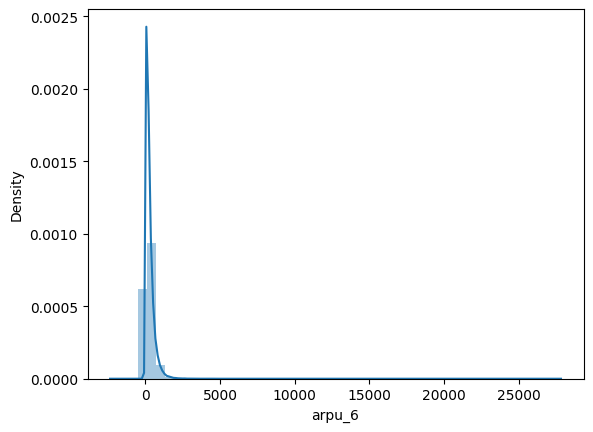

In [248]:
# Plot the average revenue per user in June

univariate(churn.arpu_6)

count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


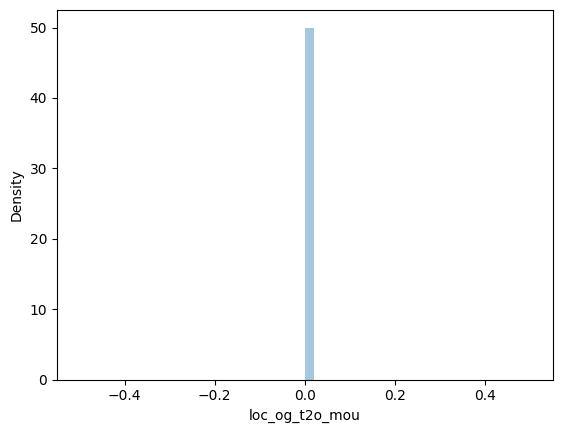

In [249]:
# Plot the minutes of usage of local (within same telecom circle) outgoing calls of Operator T to other operator fixed line

univariate(churn.loc_og_t2o_mou)

count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


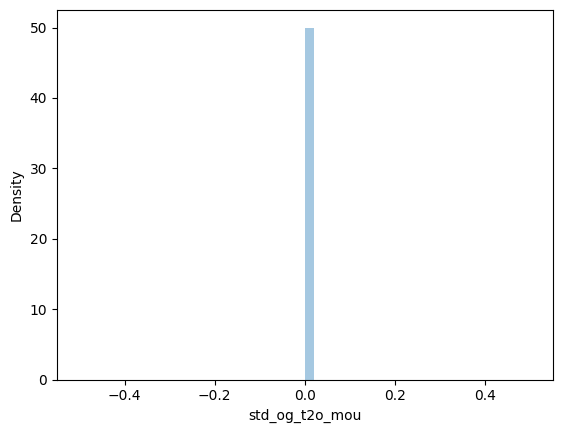

In [250]:
# Plot the minutes of usage of STD (outside the calling circle) outgoing calls of Operator T to other operator fixed line

univariate(churn.std_og_t2o_mou)

In [251]:
# Plot the minutes of usage of all kind of calls within the same operator network for the month of August

univariate(churn.onnet_mou_8)

count    99999.000000
mean       -45.915874
std        808.481468
min      -3649.713619
25%          4.090000
50%         28.040000
75%        106.740000
max      10752.560000
Name: onnet_mou_8, dtype: float64


In [252]:
# Plot the minutes of usage of all kind of calls outside the operator T network for the month of September

univariate(churn.offnet_mou_9)

count    99999.000000
mean       254.194142
std        377.736316
min          0.000000
25%         31.230000
50%        101.290000
75%        289.895000
max      10310.760000
Name: offnet_mou_9, dtype: float64


## Bivariate EDA

Now visualize and analyse the relationship between different features in the data set

In [253]:
# define the function to create bivariate plots

def bivariate(variable_1, variable_2):
  if data_type(variable_1) == 'numerical' and data_type(variable_2) == 'numerical':
    sns.regplot(x=variable_1, y=variable_2)
  elif (data_type(variable_1) == 'categorical' and data_type(variable_2) == 'numerical') or (data_type(variable_1) == 'numerical' and data_type(variable_2) == 'categorical'):
    sns.boxplot(x=variable_1, y=variable_2)


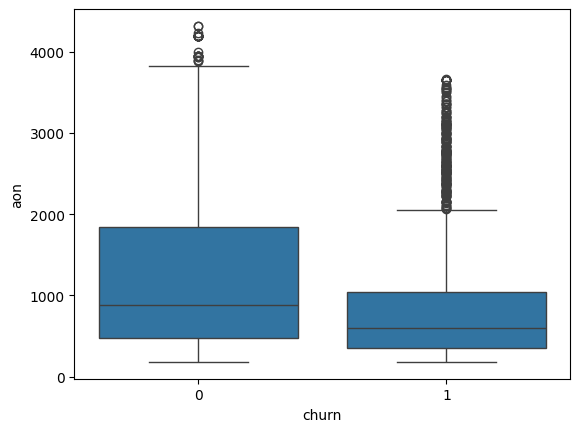

In [254]:
# Plot the relationship between different variables present in the data set

bivariate(churn_filtered.churn, churn_filtered.aon)

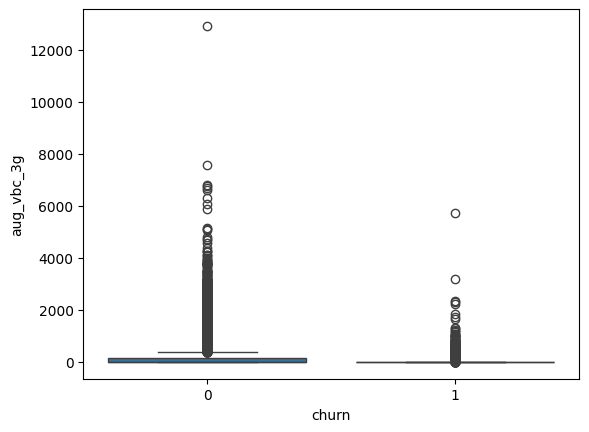

In [255]:
# plot the relationship between churn vs  volume based recharge of 3g for Aug
bivariate(churn_filtered.churn, churn_filtered.aug_vbc_3g)

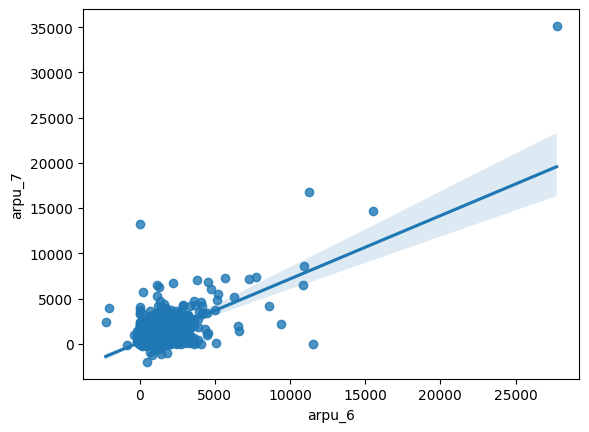

In [256]:
# relationship between average revenue per user compared to June and July.
bivariate(churn_filtered.arpu_6, churn_filtered.arpu_7)

In [257]:
# relationship of average revenue per user compared with June and August.
bivariate(churn_filtered.arpu_6, churn_filtered.arpu_8)

In [258]:
# relationship between churn vs minutes of usage of spcial outgoing calls in august.
bivariate(churn_filtered.churn,churn_filtered.spl_og_mou_8)

In [259]:
 # relationship between total outgoing calls of users vs Churn
bivariate(churn_filtered.total_og_mou_8, churn_filtered.churn)

### Cap outliers in all numeric variables

Create a function to deal with outliers using the IQR method

In [261]:
# function for capping outliers
def cap_outliers(array):

    # Get the 75% quantile of the array
    # Get the 25% quantile of the array
    # Get the interquartile range (IQR) (q3 - q1)

    Q3 = np.quantile(array, 0.75)
    Q1 = np.quantile(array, 0.25)
    IQR = Q3 - Q1


    # Calculate the upper limit - 75% quartile + 1.5*IQR
    # Calculate the lower limit - 25% quartile - 1.5*IQR

    upper_limit = Q3 + (1.5 * IQR)
    lower_limit = Q1 - (1.5 * IQR)

    # Perform outlier capping
    # Set all the values in the array above the upper limit to be equal to the upper limit
    # Set all the values in the array below the lower limit to be equal to the lower limit

    array[array > upper_limit] = upper_limit
    array[array < lower_limit] = lower_limit

    return array

The following is an example to help you understand how capping is done to treat outliers

In [262]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array))

Array after capping outliers: 
 [-49   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98 148]


Use the outlier capping function to cap the outliers present in all the numeric columns in the data set

In [263]:
# cap outliers in all the numeric columns using your outlier capping function

churn_filtered[num_cols] = churn_filtered[num_cols].apply(cap_outliers, axis=0)

**Checklist:**
- Created functions to carry out univariate and bivariate analysis of the columns in the data set
- Capped outliers by creating a function and applying it on all the numerical features

# Task 5: Modeling

### Description:
In this task, you will train and evaluate predictive models using your prepared dataset.

## i) Importing necessary libraries for machine learning and deep learning

In [264]:
# !pip install scikeras[tensorflow]

In [265]:
#algorithms for sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#baseline linear model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#modules for hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#modules for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve

# Import methods for building neural networks
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

# Import 'KerasClassifier' from 'keras' for connecting neural networks with 'sklearn' and 'GridSearchCV'
#from scikeras.wrappers import KerasClassifier


## ii) Preprocessing data

In [266]:
# change churn to numeric
churn_filtered['churn'] = churn_filtered['churn'].astype('int')

In [267]:
# Extract input and output data

X = churn_filtered.drop('churn', axis=1)
y = churn_filtered['churn']

Create dummy variables for the categorical features

In [268]:
# Use dummy variables for categorical variables

X = pd.get_dummies(X, drop_first=True, dtype = int)

### Train Test split

In [269]:
# Divide data into train and test
# Note: Set the 'random_state' parameter to '4'
# Note: Set the 'test_size' parameter to '0.25'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(22500, 178)

(22500,)

(7501, 178)

(7501,)

**Checkpoint:** You must have obtained 22500 observations in the train set and 7501 observations in the test set.

In [270]:
X_new = X.to_numpy()

#train-test split using stratified K fold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X_new,y)

for train_index, test_index in skf.split(X_new,y):
  X_train, X_test = X_new[train_index], X_new[test_index]
  y_train, y_test = y[train_index], y[test_index]

print('\n')
y_train.value_counts()

2

churn
0    13780
1     1221
Name: count, dtype: int64

### Handling Class Imbalance

Classification tasks often involve datasets with class imbalances, where the number of samples in one class significantly outweighs the other(s). Class imbalance can pose significant challenges to the learning algorithms, as they tend to favor the majority class and struggle to accurately predict the minority class. Data augmentation is one such technique that you have studied earlier, however, in this case study we will be exploring class imbalance techniques as an alternative or complementary approach.

While data augmentation has proven to be a valuable tool in addressing class imbalance, recent research highlights the advantages of leveraging class imbalance techniques as a primary approach or in conjunction with augmentation methods. By explicitly addressing the class imbalance issue, these techniques ensure that the learning algorithm better captures the nuances of all classes, resulting in improved classification performance.

In this capstone, observe that the dataset is imbalanced. You should get the number of entries with output '1' approximately 1/10th of the number of entries with output '0'. This means that if we run a simple machine learning model, it should already show 90% accuracy.

It is the most important for the model to predict which customer will churn as this will decide how their business is performing. We have to create a model that will predict the output '1' accurately. But its corresponding number of entries are very less.

Hence, we will be doing some sampling methods to make the data set balanced.

1) **Random Under-Sampling**: This method basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

We have seen how imbalanced the data set is. With random under-sampling, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. This means that if there are 1221 '0' class data entries, then there will be 1221 '1' class data entries by removing the rest.

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss.

In [271]:
# random under sampling using imblearn
# Use the RandomUnderSampler (RUS) function to produce new X and y from X_train and y_train
# Use random_state as 1 for reproducibility

rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

y_rus.value_counts()

churn
0    1221
1    1221
Name: count, dtype: int64

In [272]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42, stratify=y_rus)
y_train_rus.value_counts()

churn
1    977
0    976
Name: count, dtype: int64

1) **Random Over-Sampling**: This method basically consists of adding data in order to have a more balanced dataset and thus avoiding our models to overfitting.

We have seen how imbalanced the data set is. With random over-sampling, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. This means that if there are 13780 '1' class data entries, then there will be 13780 '0' class data entries by removing the rest.

In [273]:
# random over sampling with imblearn
# Use the RandomOverSampler (ROS) function to produce new X and y from X_train and y_train
# Use random_state as 1 for reproducibility

ros = RandomOverSampler(random_state=1)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

y_ros.value_counts()

churn
1    13780
0    13780
Name: count, dtype: int64

In [274]:
#train Test split
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, stratify=y_ros, random_state=42)
y_train_ros.value_counts()

churn
0    11024
1    11024
Name: count, dtype: int64

Now, let's test different machine learning models over the three data sets, namely, the original cleaned data set, the under-sampled data set and the over-sampled data set.

## Logistic Regression

Build a logistic regression model without applying any techniques to address class imbalance

In [275]:
# Defining the logistic regression model and fit it on the normal X_train and y_train
# 'penalty' is set to 'none'
# 'solver' is set to 'lbfgs'
# 'random_state' is set to 0
# 'max_iter' is set to 100
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'Logistic Regression - without balancing'

log = LogisticRegression(penalty=None, solver='lbfgs', random_state=0, max_iter=100)
log.fit(X_train, y_train)

# Evaluating the accuracy of the training and validation sets

log_train_acc = log.score(X_train, y_train)
log_val_acc = log.score(X_test, y_test)

log_train_pred = log.predict(X_train)
log_val_pred = log.predict(X_test)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = metrics.f1_score(y_test, log_val_pred)
precision = metrics.precision_score(y_test, log_val_pred)
recall = metrics.recall_score(y_test, log_val_pred)


# creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, log_train_acc, log_val_acc, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score',
                                          'F1 Score', 'Precision', 'Recall'])

LogisticRegression(penalty=None, random_state=0)

In [276]:
print(f'F1 Score: {f_score:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

F1 Score: 0.52
Precision: 0.67
Recall: 0.42


Train a logistic regression model on a balanced data set achieved through random undersampling

In [277]:
  # Defining the logistic regression model and fit it on the random under sampled X_train_rus and y_train_rus
# 'penalty' is set to 'none'
# 'solver' is set to 'lbfgs'
# 'random_state' is set to 0
# 'max_iter' is set to 100
model_name = 'Logistic Regression - Random Undersampling'

log = LogisticRegression(penalty=None, solver='lbfgs', random_state=0, max_iter=100)
log.fit(X_train_rus, y_train_rus)

# Evaluating the accuracy of the training and validation sets

log_train_acc = log.score(X_train_rus, y_train_rus)
log_val_acc = log.score(X_test_rus, y_test_rus)

log_train_pred = log.predict(X_train_rus)
log_val_pred = log.predict(X_test_rus)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = metrics.f1_score(y_test_rus, log_val_pred)
precision = metrics.precision_score(y_test_rus, log_val_pred)
recall = metrics.recall_score(y_test_rus, log_val_pred)

# adding calculations to dataframe
model_eval_data = [model_name, log_train_acc, log_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}

model_eval_df = pd.DataFrame([model_eval_dict])

#evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df = pd.concat([evaluate_df, model_eval_df], ignore_index=True)
evaluate_df


LogisticRegression(penalty=None, random_state=0)

Model Name  Training Score  Testing Score  \
0     Logistic Regression - without balancing        0.940871       0.936333   
1  Logistic Regression - Random Undersampling        0.842294       0.842536   

   F1 Score  Precision    Recall  
0  0.519376   0.672751  0.422951  
1  0.843177   0.838057  0.848361

Train a logistic regression model on a balanced dataset achieved through random oversampling

In [278]:
# Defining the logistic regression model and fit it on the random over sampled X_train_ros and y_train_ros
# 'penalty' is set to 'none'
# 'solver' is set to 'lbfgs'
# 'random_state' is set to 0
# 'max_iter' is set to 100
model_name = 'Logistic Regression - Random Oversampling'

log = LogisticRegression(penalty=None, solver='lbfgs', random_state=0, max_iter=100)
log.fit(X_train_ros, y_train_ros)

# Evaluating the accuracy of the training and validation sets

log_train_acc = log.score(X_train_ros, y_train_ros)
log_val_acc = log.score(X_test_ros, y_test_ros)

log_train_pred = log.predict(X_train_ros)
log_val_pred = log.predict(X_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = metrics.f1_score(y_test_ros, log_val_pred)
precision = metrics.precision_score(y_test_ros, log_val_pred)
recall = metrics.precision_score(y_test_ros, log_val_pred)

# adding calculations to dataframe
model_eval_data = [model_name, log_train_acc, log_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}

model_eval_df = pd.DataFrame([model_eval_dict])

#evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df = pd.concat([evaluate_df, model_eval_df], ignore_index=True)
evaluate_df

LogisticRegression(penalty=None, random_state=0)

Model Name  Training Score  Testing Score  \
0     Logistic Regression - without balancing        0.940871       0.936333   
1  Logistic Regression - Random Undersampling        0.842294       0.842536   
2   Logistic Regression - Random Oversampling        0.840802       0.847968   

   F1 Score  Precision    Recall  
0  0.519376   0.672751  0.422951  
1  0.843177   0.838057  0.848361  
2  0.848463   0.845710  0.845710

## Decision Tree

Build a decision tree model without applying any techniques to address class imbalance

In [279]:
# Defining the decision tree model and fit it on the normal X_train and y_train
# 'max_depth' is set to 50
# 'random_state' is set to 0
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'Decision Tree - without balancing'

tree = DecisionTreeClassifier(max_depth=50, random_state=0)
tree.fit(X_train, y_train)

# Evaluating the accuracy of the training and validation sets

tree_train_acc = tree.score(X_train, y_train)
tree_val_acc = tree.score(X_test, y_test)

tree_train_pred = tree.predict(X_train)
tree_val_pred = tree.predict(X_test)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = metrics.f1_score(y_test, tree_val_pred)
precision = metrics.precision_score(y_test, tree_val_pred)
recall = metrics.recall_score(y_test, tree_val_pred)

# adding calculations to dataframe
model_eval_data = [model_name, tree_train_acc, tree_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}

model_eval_df = pd.DataFrame([model_eval_dict])
# evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df = pd.concat([evaluate_df, model_eval_df], ignore_index=True)
evaluate_df




DecisionTreeClassifier(max_depth=50, random_state=0)

Model Name  Training Score  Testing Score  \
0     Logistic Regression - without balancing        0.940871       0.936333   
1  Logistic Regression - Random Undersampling        0.842294       0.842536   
2   Logistic Regression - Random Oversampling        0.840802       0.847968   
3           Decision Tree - without balancing        1.000000       0.910867   

   F1 Score  Precision    Recall  
0  0.519376   0.672751  0.422951  
1  0.843177   0.838057  0.848361  
2  0.848463   0.845710  0.845710  
3  0.491054   0.458422  0.528689

Train a decision tree model on a balanced dataset achieved through random undersampling

In [280]:
# Defining the decision tree model and fit it on the random under sampled X_train_rus and y_train_rus
# 'max_depth' is set to 50
# 'random_state' is set to 0
model_name = 'Decision Tree - Random Undersampling'

tree = DecisionTreeClassifier(max_depth=50, random_state=0)
tree.fit(X_train_rus, y_train_rus)

# Evaluating the accuracy of the training and validation sets

tree_train_acc = tree.score(X_train_rus, y_train_rus)
tree_val_acc = tree.score(X_test_rus, y_test_rus)

tree_train_pred = tree.predict(X_train_rus)
tree_val_pred = tree.predict(X_test_rus)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = metrics.f1_score(y_test_rus, tree_val_pred)
precision = metrics.precision_score(y_test_rus, tree_val_pred)
recall = metrics.recall_score(y_test_rus, tree_val_pred)

# adding calculations to dataframe
model_eval_data = [model_name, tree_train_acc, tree_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}

model_eval_df = pd.DataFrame([model_eval_dict])

# evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df = pd.concat([evaluate_df, model_eval_df], ignore_index=True)
evaluate_df

DecisionTreeClassifier(max_depth=50, random_state=0)

Model Name  Training Score  Testing Score  \
0     Logistic Regression - without balancing        0.940871       0.936333   
1  Logistic Regression - Random Undersampling        0.842294       0.842536   
2   Logistic Regression - Random Oversampling        0.840802       0.847968   
3           Decision Tree - without balancing        1.000000       0.910867   
4        Decision Tree - Random Undersampling        1.000000       0.775051   

   F1 Score  Precision    Recall  
0  0.519376   0.672751  0.422951  
1  0.843177   0.838057  0.848361  
2  0.848463   0.845710  0.845710  
3  0.491054   0.458422  0.528689  
4  0.776423   0.770161  0.782787

Train a decision tree model on a balanced dataset achieved through random oversampling

In [281]:
# Defining the decision tree model and fit it on the random over sampled X_train_ros and y_train_ros
# 'max_depth' is set to 50
# 'random_state' is set to 0
model_name = 'Decision Tree - Random Oversampling'

tree = DecisionTreeClassifier(max_depth=50, random_state=0)
tree.fit(X_train_ros, y_train_ros)

# Evaluating the accuracy of the training and validation sets

tree_train_acc = tree.score(X_train_ros, y_train_ros)
tree_val_acc = tree.score(X_test_ros, y_test_ros)

tree_train_pred = tree.predict(X_train_ros)
tree_val_pred = tree.predict(X_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = metrics.f1_score(y_test_ros, tree_val_pred)
precision = metrics.precision_score(y_test_ros, tree_val_pred)
recall = metrics.recall_score(y_test_ros, tree_val_pred)

# adding calculations to dataframe
model_eval_data = [model_name, tree_train_acc, tree_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}

model_eval_df = pd.DataFrame([model_eval_dict])
# evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df = pd.concat([evaluate_df, model_eval_df], ignore_index=True)
evaluate_df

DecisionTreeClassifier(max_depth=50, random_state=0)

Model Name  Training Score  Testing Score  \
0     Logistic Regression - without balancing        0.940871       0.936333   
1  Logistic Regression - Random Undersampling        0.842294       0.842536   
2   Logistic Regression - Random Oversampling        0.840802       0.847968   
3           Decision Tree - without balancing        1.000000       0.910867   
4        Decision Tree - Random Undersampling        1.000000       0.775051   
5         Decision Tree - Random Oversampling        1.000000       0.972968   

   F1 Score  Precision    Recall  
0  0.519376   0.672751  0.422951  
1  0.843177   0.838057  0.848361  
2  0.848463   0.845710  0.845710  
3  0.491054   0.458422  0.528689  
4  0.776423   0.770161  0.782787  
5  0.973680   0.948709  1.000000

## kNN

Build a KNN model without applying any techniques to address class imbalance

In [282]:
# Defining the kNN model and fit it on the normal X_train and y_train
# 'n_neighbors' is set to 14
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'kNN - without balancing'

knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

# Evaluating the accuracy of the training and validation sets

knn_train_acc = knn.score(X_train, y_train)
knn_val_acc = knn.score(X_test, y_test)

knn_train_pred = knn.predict(X_train)
knn_val_pred = knn.predict(X_test)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = metrics.f1_score(y_test, knn_val_pred)
precision = metrics.precision_score(y_test, knn_val_pred)
recall = metrics.recall_score(y_test, knn_val_pred)

# adding calculations to dataframe
model_eval_data = [model_name, knn_train_acc, knn_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}

model_eval_df = pd.DataFrame([model_eval_dict])

#evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df = pd.concat([evaluate_df, model_eval_df], ignore_index=True)
evaluate_df

KNeighborsClassifier(n_neighbors=14)

Model Name  Training Score  Testing Score  \
0     Logistic Regression - without balancing        0.940871       0.936333   
1  Logistic Regression - Random Undersampling        0.842294       0.842536   
2   Logistic Regression - Random Oversampling        0.840802       0.847968   
3           Decision Tree - without balancing        1.000000       0.910867   
4        Decision Tree - Random Undersampling        1.000000       0.775051   
5         Decision Tree - Random Oversampling        1.000000       0.972968   
6                     kNN - without balancing        0.936338       0.933267   

   F1 Score  Precision    Recall  
0  0.519376   0.672751  0.422951  
1  0.843177   0.838057  0.848361  
2  0.848463   0.845710  0.845710  
3  0.491054   0.458422  0.528689  
4  0.776423   0.770161  0.782787  
5  0.973680   0.948709  1.000000  
6  0.404521   0.737527  0.278689

Train a KNN model on a balanced dataset achieved through random undersampling

In [283]:
# Defining the kNN model and fit it on the random under sampled X_train_rus and y_train_rus
# 'n_neighbors' is set to 14
model_name = 'kNN - Random Undersampling'

knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train_rus, y_train_rus)

# Evaluating the accuracy of the training and validation sets

knn_train_acc = knn.score(X_train_rus, y_train_rus)
knn_val_acc = knn.score(X_test_rus, y_test_rus)

knn_train_pred = knn.predict(X_train_rus)
knn_val_pred = knn.predict(X_test_rus)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = metrics.f1_score(y_test_rus, knn_val_pred)
precision = metrics.precision_score(y_test_rus, knn_val_pred)
recall = metrics.recall_score(y_test_rus, knn_val_pred)

# adding calculations to dataframe
model_eval_data = [model_name, knn_train_acc, knn_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}

model_eval_df = pd.DataFrame([model_eval_dict])

# evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df = pd.concat([evaluate_df, model_eval_df], ignore_index=True)
evaluate_df

KNeighborsClassifier(n_neighbors=14)

Model Name  Training Score  Testing Score  \
0     Logistic Regression - without balancing        0.940871       0.936333   
1  Logistic Regression - Random Undersampling        0.842294       0.842536   
2   Logistic Regression - Random Oversampling        0.840802       0.847968   
3           Decision Tree - without balancing        1.000000       0.910867   
4        Decision Tree - Random Undersampling        1.000000       0.775051   
5         Decision Tree - Random Oversampling        1.000000       0.972968   
6                     kNN - without balancing        0.936338       0.933267   
7                  kNN - Random Undersampling        0.826933       0.809816   

   F1 Score  Precision    Recall  
0  0.519376   0.672751  0.422951  
1  0.843177   0.838057  0.848361  
2  0.848463   0.845710  0.845710  
3  0.491054   0.458422  0.528689  
4  0.776423   0.770161  0.782787  
5  0.973680   0.948709  1.000000  
6  0.404521   0.737527  0.278689  
7  0.795604   0.857820  0.741803

Train a KNN model on a balanced dataset achieved through random oversampling

In [284]:
# Defining the kNN model and fit it on the random over sampled X_train_ros and y_train_ros
# 'n_neighbors' is set to 14
model_name = 'kNN - Random Oversampling'

knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train_ros, y_train_ros)

# Evaluating the accuracy of the training and validation sets

knn_train_acc = knn.score(X_train_ros, y_train_ros)
knn_val_acc = knn.score(X_test_ros, y_test_ros)

knn_train_pred = knn.predict(X_train_ros)
knn_val_pred = knn.predict(X_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = metrics.f1_score(y_test_ros, knn_val_pred)
precision = metrics.precision_score(y_test_ros, knn_val_pred)
recall = metrics.recall_score(y_test_ros, knn_val_pred)

# adding calculations to dataframe
model_eval_data = [model_name, knn_train_acc, knn_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}

model_eval_df = pd.DataFrame([model_eval_dict])

# evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df = pd.concat([evaluate_df, model_eval_df], ignore_index=True)
evaluate_df

KNeighborsClassifier(n_neighbors=14)

Model Name  Training Score  Testing Score  \
0     Logistic Regression - without balancing        0.940871       0.936333   
1  Logistic Regression - Random Undersampling        0.842294       0.842536   
2   Logistic Regression - Random Oversampling        0.840802       0.847968   
3           Decision Tree - without balancing        1.000000       0.910867   
4        Decision Tree - Random Undersampling        1.000000       0.775051   
5         Decision Tree - Random Oversampling        1.000000       0.972968   
6                     kNN - without balancing        0.936338       0.933267   
7                  kNN - Random Undersampling        0.826933       0.809816   
8                   kNN - Random Oversampling        0.895183       0.877358   

   F1 Score  Precision    Recall  
0  0.519376   0.672751  0.422951  
1  0.843177   0.838057  0.848361  
2  0.848463   0.845710  0.845710  
3  0.491054   0.458422  0.528689  
4  0.776423   0.770161  0.782787  
5  0.973680   0.948709  1.000000  
6  0.404521   0.737527  0.278689  
7  0.795604   0.857820  0.741803  
8  0.882964   0.844371  0.925254

## Random Forest Classifier

Build a random forest model without applying any techniques to address class imbalance

In [285]:
# Defining the Random Forest Classifier model and fit it on the normal X_train and y_train
# 'n_estimators' is set to 200
# 'max_depth' is set to 5
# 'class_weight' is set to 'balanced'
# 'random_state' is set to 123
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'Random Forest - without balancing'

rf = RandomForestClassifier(n_estimators=200, max_depth=5, class_weight='balanced', random_state=123)
rf.fit(X_train, y_train)

# Evaluating the accuracy of the training and validation sets

rf_train_acc = rf.score(X_train, y_train)
rf_val_acc = rf.score(X_test, y_test)

rf_train_pred = rf.predict(X_train)
rf_val_pred = rf.predict(X_test)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = metrics.f1_score(y_test, rf_val_pred)
precision = metrics.precision_score(y_test, rf_val_pred)
recall = metrics.recall_score(y_test, rf_val_pred)

# adding calculations to dataframe
model_eval_data = [model_name, rf_train_acc, rf_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}

# Get the feature importances
impotance_rf = rf.feature_importances_

model_eval_df = pd.DataFrame([model_eval_dict])

# evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df = pd.concat([evaluate_df, model_eval_df], ignore_index=True)
evaluate_df

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=123)

Model Name  Training Score  Testing Score  \
0     Logistic Regression - without balancing        0.940871       0.936333   
1  Logistic Regression - Random Undersampling        0.842294       0.842536   
2   Logistic Regression - Random Oversampling        0.840802       0.847968   
3           Decision Tree - without balancing        1.000000       0.910867   
4        Decision Tree - Random Undersampling        1.000000       0.775051   
5         Decision Tree - Random Oversampling        1.000000       0.972968   
6                     kNN - without balancing        0.936338       0.933267   
7                  kNN - Random Undersampling        0.826933       0.809816   
8                   kNN - Random Oversampling        0.895183       0.877358   
9           Random Forest - without balancing        0.912139       0.898200   

   F1 Score  Precision    Recall  
0  0.519376   0.672751  0.422951  
1  0.843177   0.838057  0.848361  
2  0.848463   0.845710  0.845710  
3  0.491054   0.458422  0.528689  
4  0.776423   0.770161  0.782787  
5  0.973680   0.948709  1.000000  
6  0.404521   0.737527  0.278689  
7  0.795604   0.857820  0.741803  
8  0.882964   0.844371  0.925254  
9  0.541028   0.427148  0.737705

Train a random forest model on a balanced dataset achieved through random undersampling

In [286]:
# Defining the Random Forest Classifier model and fit it on the random under sampled X_train_rus and y_train_rus
# 'n_estimators' is set to 200
# 'max_depth' is set to 5
# 'class_weight' is set to 'balanced'
# 'random_state' is set to 123
model_name = 'Random Forest - Random Undersampling'

rf = RandomForestClassifier(n_estimators=200, max_depth=5, class_weight='balanced', random_state=123)
rf.fit(X_train_rus, y_train_rus)

# Evaluating the accuracy of the training and validation sets

rf_train_acc = rf.score(X_train_rus, y_train_rus)
rf_val_acc = rf.score(X_test_rus, y_test_rus)

rf_train_pred = rf.predict(X_train_rus)
rf_val_pred = rf.predict(X_test_rus)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = metrics.f1_score(y_test_rus, rf_val_pred)
precision = metrics.precision_score(y_test_rus, rf_val_pred)
recall = metrics.recall_score(y_test_rus, rf_val_pred)

# adding calculations to dataframe
model_eval_data = [model_name, rf_train_acc, rf_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}

model_eval_df = pd.DataFrame([model_eval_dict])

# evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df = pd.concat([evaluate_df, model_eval_df], ignore_index=True)
evaluate_df

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=123)

Model Name  Training Score  Testing Score  \
0      Logistic Regression - without balancing        0.940871       0.936333   
1   Logistic Regression - Random Undersampling        0.842294       0.842536   
2    Logistic Regression - Random Oversampling        0.840802       0.847968   
3            Decision Tree - without balancing        1.000000       0.910867   
4         Decision Tree - Random Undersampling        1.000000       0.775051   
5          Decision Tree - Random Oversampling        1.000000       0.972968   
6                      kNN - without balancing        0.936338       0.933267   
7                   kNN - Random Undersampling        0.826933       0.809816   
8                    kNN - Random Oversampling        0.895183       0.877358   
9            Random Forest - without balancing        0.912139       0.898200   
10        Random Forest - Random Undersampling        0.876088       0.854806   

    F1 Score  Precision    Recall  
0   0.519376   0.672751  0.422951  
1   0.843177   0.838057  0.848361  
2   0.848463   0.845710  0.845710  
3   0.491054   0.458422  0.528689  
4   0.776423   0.770161  0.782787  
5   0.973680   0.948709  1.000000  
6   0.404521   0.737527  0.278689  
7   0.795604   0.857820  0.741803  
8   0.882964   0.844371  0.925254  
9   0.541028   0.427148  0.737705  
10  0.844639   0.906103  0.790984

Train a random forest model on a balanced dataset achieved through random oversampling

In [287]:
# Defining the Random Forest Classifier model and fit it on the random over sampled X_train_ros and y_train_ros
# 'n_estimators' is set to 200
# 'max_depth' is set to 5
# 'class_weight' is set to 'balanced'
# 'random_state' is set to 123
model_name = 'Random Forest - Random Oversampling'

rf = RandomForestClassifier(n_estimators=200, max_depth=5, class_weight='balanced', random_state=123)
rf.fit(X_train_ros, y_train_ros)

# Evaluating the accuracy of the training and validation sets

rf_train_acc = rf.score(X_train_ros, y_train_ros)
rf_val_acc = rf.score(X_test_ros, y_test_ros)

rf_train_pred = rf.predict(X_train_ros)
rf_val_pred = rf.predict(X_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = metrics.f1_score(y_test_ros, rf_val_pred)
precision = metrics.precision_score(y_test_ros, rf_val_pred)
recall = metrics.recall_score(y_test_ros, rf_val_pred)

# adding calculations to dataframe
model_eval_data = [model_name, rf_train_acc, rf_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}

model_eval_df = pd.DataFrame([model_eval_dict])

# evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df = pd.concat([evaluate_df, model_eval_df], ignore_index=True)
evaluate_df

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=123)

Model Name  Training Score  Testing Score  \
0      Logistic Regression - without balancing        0.940871       0.936333   
1   Logistic Regression - Random Undersampling        0.842294       0.842536   
2    Logistic Regression - Random Oversampling        0.840802       0.847968   
3            Decision Tree - without balancing        1.000000       0.910867   
4         Decision Tree - Random Undersampling        1.000000       0.775051   
5          Decision Tree - Random Oversampling        1.000000       0.972968   
6                      kNN - without balancing        0.936338       0.933267   
7                   kNN - Random Undersampling        0.826933       0.809816   
8                    kNN - Random Oversampling        0.895183       0.877358   
9            Random Forest - without balancing        0.912139       0.898200   
10        Random Forest - Random Undersampling        0.876088       0.854806   
11         Random Forest - Random Oversampling        0.867426       0.866473   

    F1 Score  Precision    Recall  
0   0.519376   0.672751  0.422951  
1   0.843177   0.838057  0.848361  
2   0.848463   0.845710  0.845710  
3   0.491054   0.458422  0.528689  
4   0.776423   0.770161  0.782787  
5   0.973680   0.948709  1.000000  
6   0.404521   0.737527  0.278689  
7   0.795604   0.857820  0.741803  
8   0.882964   0.844371  0.925254  
9   0.541028   0.427148  0.737705  
10  0.844639   0.906103  0.790984  
11  0.860023   0.903677  0.820392

Compare the performances of the different predictive models that you built above

In [288]:
evaluate_df

Model Name  Training Score  Testing Score  \
0      Logistic Regression - without balancing        0.940871       0.936333   
1   Logistic Regression - Random Undersampling        0.842294       0.842536   
2    Logistic Regression - Random Oversampling        0.840802       0.847968   
3            Decision Tree - without balancing        1.000000       0.910867   
4         Decision Tree - Random Undersampling        1.000000       0.775051   
5          Decision Tree - Random Oversampling        1.000000       0.972968   
6                      kNN - without balancing        0.936338       0.933267   
7                   kNN - Random Undersampling        0.826933       0.809816   
8                    kNN - Random Oversampling        0.895183       0.877358   
9            Random Forest - without balancing        0.912139       0.898200   
10        Random Forest - Random Undersampling        0.876088       0.854806   
11         Random Forest - Random Oversampling        0.867426       0.866473   

    F1 Score  Precision    Recall  
0   0.519376   0.672751  0.422951  
1   0.843177   0.838057  0.848361  
2   0.848463   0.845710  0.845710  
3   0.491054   0.458422  0.528689  
4   0.776423   0.770161  0.782787  
5   0.973680   0.948709  1.000000  
6   0.404521   0.737527  0.278689  
7   0.795604   0.857820  0.741803  
8   0.882964   0.844371  0.925254  
9   0.541028   0.427148  0.737705  
10  0.844639   0.906103  0.790984  
11  0.860023   0.903677  0.820392

In this case study, the most important factor in the prediction performance of a machine learning model is that it should be able to predict the positive class as accurately as possible. This means that the false negatives and false positives are supposed to be as minimal as possible. This further means that precision and recall should be as high as possible.

There is another factor to consider. The most important factor which can lead to a company loss is the false negatives. This is because if we predict that a customer did not churn but in reality, the customer did, the company will miss out on the data of churned customers. Hence, observing the recall factor is much more important than precision.

## Hyperparameter tuning using GridSearchCV

Choose the model that performs in a robust manner with good accuracy, precision and recall. Especially look out for the recall value because a good recall value means that it is able to accurately classify the data examples of the customers who churned

Fitting 3 folds for each of 7 candidates, totalling 21 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': array([ 5, 20, 35, 50, 65, 80, 95])},
             return_train_score=True, scoring='accuracy', verbose=1)

Best parameters found:  {'max_depth': 35}


Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy vs max_depth')

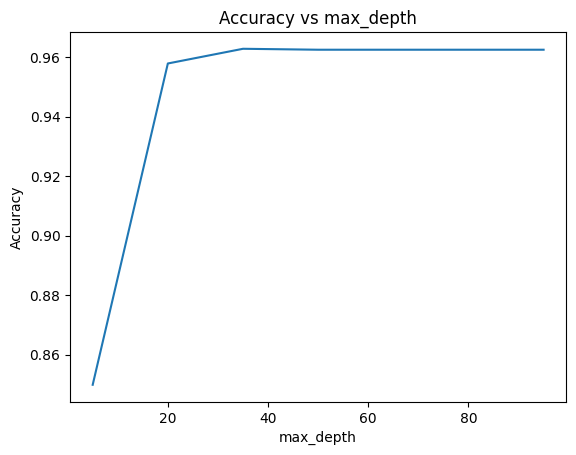

In [289]:
# Define your model and parameter grid
# Make sure to use random_state value as 0

tree = DecisionTreeClassifier(random_state=0)
param_grid = {'max_depth': np.arange(5, 105, 15)}

# Perform GridSearchCV

grid_search = GridSearchCV(tree, param_grid, cv=3, scoring = 'accuracy', return_train_score = True, verbose = 1)
grid_search.fit(X_train_ros, y_train_ros)

# Display the best combination of parameters obtained from GridSearchCV

print("Best parameters found: ", grid_search.best_params_)

plt.plot(param_grid['max_depth'], grid_search.cv_results_['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max_depth');
plt.show()


Retrain your model on the combination of parameters obtained from GridSearchCV

In [290]:
# Re-fit your model with the combination of parameters obtained from GridSearchCV
# Make sure to use random_state value as 0

tree_best = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'], random_state=0)
tree_best.fit(X_train_ros, y_train_ros)

# Evaluating the accuracy of the training and validation sets

tree_best_train_acc = tree_best.score(X_train_ros, y_train_ros)
tree_best_val_acc = tree_best.score(X_test_ros, y_test_ros)

tree_best_train_pred = tree_best.predict(X_train_ros)
tree_best_val_pred = tree_best.predict(X_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = metrics.f1_score(y_test_ros, tree_best_val_pred)
precision = metrics.precision_score(y_test_ros, tree_best_val_pred)
recall = metrics.recall_score(y_test_ros, tree_best_val_pred)


DecisionTreeClassifier(max_depth=35, random_state=0)

In [291]:
# Find the importance of all the features according to the optimal model defined above

importance = tree_best.feature_importances_





Create a dataframe with the feature importance in descending order so that the highest important features are shown at the start of the dataframe

In [292]:
# Display the dataframe obtained

features = X.columns.tolist()

# creating the data frame of with feature importance

feature_importance = {}

for i, feature in enumerate(features):
    feature_importance[feature] = round(importance[i],5)

print(f"Feature Importance:")
df = pd.DataFrame(feature_importance.items(), columns=['Feature', 'Importance'])
df = df.sort_values(by='Importance', ascending=False)
df



Feature Importance:


Feature  Importance
89              total_ic_mou_8     0.37439
152      diff_total_og_mou_6_7     0.06039
119         av_rech_amt_data_8     0.04266
110         last_day_rch_amt_8     0.02814
77            std_ic_t2m_mou_8     0.01957
32                loc_og_mou_8     0.01817
158    diff_total_rech_num_6_7     0.01555
157      diff_total_ic_mou_6_7     0.01428
153        diff_loc_ic_mou_6_7     0.01259
62            loc_ic_t2t_mou_8     0.01204
149        diff_std_og_mou_6_7     0.01090
87              total_ic_mou_6     0.01054
88              total_ic_mou_7     0.01051
20            loc_og_t2t_mou_8     0.01038
101           total_rech_num_8     0.01022
4                       arpu_7     0.00992
102           total_rech_amt_6     0.00960
10                offnet_mou_7     0.00949
85                std_ic_mou_7     0.00891
122                vol_2g_mb_8     0.00881
138                        aon     0.00824
60            loc_ic_t2t_mou_6     0.00816
143              diff_arpu_6_7     0.00760
148        diff_loc_og_mou_6_7     0.00693
65            loc_ic_t2m_mou_8     0.00686
160      diff_max_rech_amt_6_7     0.00676
103           total_rech_amt_7     0.00675
63            loc_ic_t2m_mou_6     0.00672
23            loc_og_t2m_mou_8     0.00666
125                vol_3g_mb_8     0.00665
9                 offnet_mou_6     0.00663
52                spl_og_mou_7     0.00635
163  diff_av_rech_amt_data_6_7     0.00620
5                       arpu_8     0.00619
3                       arpu_6     0.00617
118         av_rech_amt_data_7     0.00577
11                offnet_mou_8     0.00574
105             max_rech_amt_6     0.00567
51                spl_og_mou_6     0.00545
61            loc_ic_t2t_mou_7     0.00540
164         diff_vol_2g_mb_6_7     0.00536
64            loc_ic_t2m_mou_7     0.00521
99            total_rech_num_6     0.00520
58              total_og_mou_7     0.00520
159    diff_total_rech_amt_6_7     0.00507
21            loc_og_t2m_mou_6     0.00489
86                std_ic_mou_8     0.00485
71                loc_ic_mou_8     0.00476
26            loc_og_t2f_mou_8     0.00437
141                 jun_vbc_3g     0.00420
151        diff_spl_og_mou_6_7     0.00419
80            std_ic_t2f_mou_8     0.00414
30                loc_og_mou_6     0.00409
144         diff_onnet_mou_6_7     0.00389
154        diff_std_ic_mou_6_7     0.00385
47                std_og_mou_8     0.00354
45                std_og_mou_6     0.00354
76            std_ic_t2m_mou_7     0.00331
100           total_rech_num_7     0.00330
145        diff_offnet_mou_6_7     0.00327
113          total_rech_data_8     0.00325
8                  onnet_mou_8     0.00310
59              total_og_mou_8     0.00309
69                loc_ic_mou_6     0.00282
6                  onnet_mou_6     0.00273
140                 jul_vbc_3g     0.00271
72            std_ic_t2t_mou_6     0.00270
121                vol_2g_mb_7     0.00259
22            loc_og_t2m_mou_7     0.00254
24            loc_og_t2f_mou_6     0.00249
36            std_og_t2m_mou_6     0.00248
68            loc_ic_t2f_mou_8     0.00246
33            std_og_t2t_mou_6     0.00238
75            std_ic_t2m_mou_6     0.00227
78            std_ic_t2f_mou_6     0.00225
70                loc_ic_mou_7     0.00221
106             max_rech_amt_7     0.00217
19            loc_og_t2t_mou_7     0.00202
31                loc_og_mou_7     0.00201
107             max_rech_amt_8     0.00194
25            loc_og_t2f_mou_7     0.00194
74            std_ic_t2t_mou_8     0.00192
117         av_rech_amt_data_6     0.00188
53                spl_og_mou_8     0.00187
108         last_day_rch_amt_6     0.00179
46                std_og_mou_7     0.00177
174              fb_user_7_0.0     0.00175
120                vol_2g_mb_6     0.00163
73            std_ic_t2t_mou_7     0.00145
104           total_rech_amt_8     0.00142
172              fb_user_6_0.0     0.00139
114            max_rech_data_6     0.00135
18            loc_og_t2t

Assess the performance of your model on different evaluation metrics

<Axes: >

Text(0.5, 14.722222222222216, 'Predicted')

Text(95.72222222222221, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix on the Training Data')

<Axes: >

Text(0.5, 14.722222222222216, 'Predicted')

Text(518.4494949494949, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix on the Validation Data')

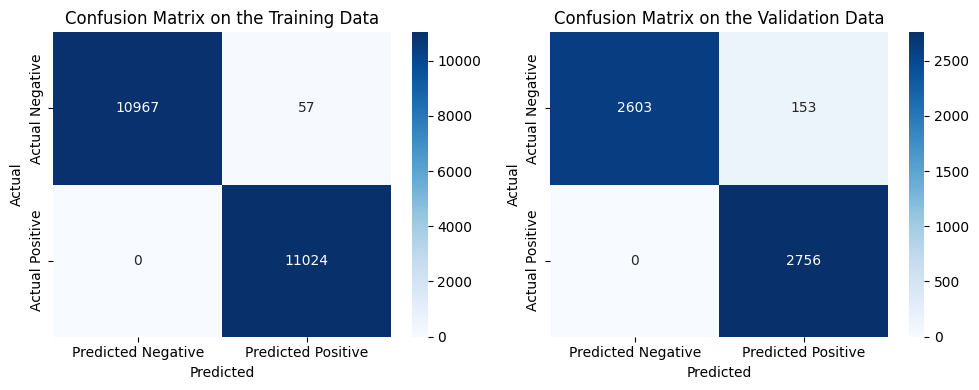

In [293]:
# Evaluating the model on the training and validation sets using accuracy, confusion metrics and AUC of ROC

cm_train = confusion_matrix(y_train_ros, tree_best_train_pred)
cm_val = confusion_matrix(y_test_ros, tree_best_val_pred)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the confusion matrix for the training set
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'], ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix on the Training Data')

# Plot the confusion matrix for the validation set
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'], ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix on the Validation Data')

# Adjust layout
plt.tight_layout()
plt.show()

In [294]:
print('\n ROC AUC on the training dataset: \n',roc_auc_score(y_train_ros, tree_best_train_pred))
print('\n ROC AUC on the training dataset: \n',roc_auc_score(y_test_ros, tree_best_val_pred))

print('\n ROC AUC on the training dataset: \n',accuracy_score(y_train_ros, tree_best_train_pred))
print('\n ROC AUC on the training dataset: \n',accuracy_score(y_test_ros, tree_best_val_pred))


 ROC AUC on the training dataset: 
 0.9974147314949201

 ROC AUC on the training dataset: 
 0.9722423802612482

 ROC AUC on the training dataset: 
 0.9974147314949202

 ROC AUC on the training dataset: 
 0.9722423802612482


## Neural Networks

Create a neural network model with the defined set of hyperparameters

In [295]:
# Define a function to create a neural network model and specify default values for variable hyperparameters
# Note: The number of hidden layers is fixed at 2
# Note: The number of neurons in the second hidden layer is fixed at 64
# Note: The output layer activation function is fixed as 'sigmoid'

# You can change the hyperparameters mentioned as arguments in the create_nn function
# So that you can use them in GridSearchCV hyperparameter tuning
# Feel free to modify the model too and test the model performance
# You can add more types of layers like Dropout, Batch normalization etc.

# Note: The variable hyperparameters list is the activation functions of the hidden layers and number of neurons in the first hidden layer
def create_nn(activation_function = 'relu',
              hidden1_neurons = 256):

    # Declare an instance of an artificial neural network model using the 'Sequential()' method
    nn = Sequential()

    # keras.Input is the input layer of the neural network
    nn.add(Input(shape = (X_train.shape[1],)))



    # Add a hidden layer using the 'add()' and 'Dense()' methods
    # Note: Set the 'units' parameter to 'hidden1_neurons'  - This specifies the number of neurons in the hidden layer
    # Note: Set the 'activation' parameter to 'activation_function' - This specifies the activation function parameter defined in the custom function
    nn.add(Dense(units = hidden1_neurons,
                 activation = activation_function))

    # Add a hidden layer using the 'add()' and 'Dense()' methods
    # Note: Set the 'units' parameter to 64  - This specifies the number of neurons in the hidden layer
    # Note: Set the 'activation' parameter to 'activation_function' - This specifies the activation function parameter defined in the custom function
    nn.add(Dense(units = 64, activation = activation_function))

    # Add the output layer using the 'add()' and 'Dense()' methods
    # Note: Set the 'units' parameter to 1 - Binary classification
    # Note: Set the 'activation' parameter to 'sigmoid' - The sigmoid activation function is used for output layer neurons in binary classification tasks
    nn.add(Dense(units = 1, activation = 'sigmoid'))

    # Compile the model using the 'compile()' method
    # Note: Set the 'loss' parameter to 'binary_crossentropy' - The binary crossentropy loss function is commonly used for binary classification tasks
    # Note: Set the 'metrics' parameter to 'accuracy' - This records the accuracy of the model along with the loss during training
    # Note: Set the 'optimizer' parameter to 'RMSprop' and set its 'learning_rate' parameter to 'learning_rate_value' - This specifies the learning rate value defined in the custom function
    nn.compile(loss = 'binary_crossentropy',
               metrics = ['accuracy'],
               optimizer = RMSprop(learning_rate = 0.01))

    return nn

In [296]:
# Create a default neural network using the 'create_nn' function and train it on the training data
nn1 = create_nn()

# Capture the training history of the model using the 'fit()' method
# Note: Set the 'validation_data' parameter to (X_val, y_val)
# Note: Set the 'epochs' parameter to 10 - This specifies the scope of loss computations and parameter updates
nn1.summary()
print('\n')
nn1_history = nn1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 256)                 │          45,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,337 (243.50 KB)

 Trainable params: 62,337 (243.50 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8788 - loss: 73.6823 - val_accuracy: 0.9187 - val_loss: 0.2829
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9191 - loss: 0.2814 - val_accuracy: 0.9187 - val_loss: 0.2821
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9166 - loss: 0.2872 - val_accuracy: 0.9187 - val_loss: 0.2824
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9167 - loss: 0.2873 - val_accuracy: 0.9187 - val_loss: 0.2821
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9204 - loss: 0.2780 - val_accuracy: 0.9187 - val_loss: 0.2821
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9163 - loss: 0.2879 - val_accuracy: 0.9187 - val_loss: 0.2821
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9191 - loss: 0.2810 - val_accuracy: 0.9187 - val_loss: 0.2824
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9181 - loss: 0.2833 - val_accuracy:

In [297]:
# Convert the neural network history object into a data frame to view its specifics
import pandas as pd
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

accuracy       loss  val_accuracy  val_loss
epoch                                             
1      0.901473  13.663919      0.918667  0.282911
2      0.918605   0.282394      0.918667  0.282062
3      0.918605   0.282235      0.918667  0.282353
4      0.918605   0.282330      0.918667  0.282143
5      0.918605   0.282380      0.918667  0.282070
6      0.918605   0.282351      0.918667  0.282083
7      0.918605   0.282250      0.918667  0.282395
8      0.918605   0.282283      0.918667  0.282252
9      0.918605   0.282377      0.918667  0.282071
10     0.918605   0.282287      0.918667  0.282032

Plot the training and validation accuracies for different values of epoch

In [298]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize=(14, 4))
sns.lineplot(data=hist, x='epoch', y='accuracy', color='red', label='Training')
sns.lineplot(data=hist, x='epoch', y='val_accuracy', color='blue', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');
plt.show()

<Figure size 1400x400 with 0 Axes>

<Axes: xlabel='epoch', ylabel='accuracy'>

<Axes: xlabel='epoch', ylabel='accuracy'>

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy as a Function of Epoch')

Assess the performance of the model on the validation data set

In [299]:
# Compute the final accuracy of the model on the validation data set using the 'evaluate()' method
performance_test = nn1.evaluate(X_test, y_test)

print('The loss value of the model on the validation data is {}'.format(performance_test[0]))
print('The accuracy of the model on the validation data is {}'.format(performance_test[1]))

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9249 - loss: 0.2670
The loss value of the model on the validation data is 0.2820320129394531
The accuracy of the model on the validation data is 0.918666660785675


Find the optimal parameters using GridSearchCV

In [300]:
#!pip install keras-tuner --upgrade

In [301]:
#from keras.wrappers.scikit_learn import KerasClassifier

In [302]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from keras_tuner import Hyperband

# Define a function to build the model
def build_model(hp):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(hp.Choice('hidden1_neurons', [256, 512]), activation=hp.Choice('activation_function', ['relu', 'sigmoid'])),
        Dense(64, activation=hp.Choice('activation_function', ['relu', 'sigmoid'])),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create a tuner instance
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=2,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(1)[0]

print(f"Best activation function: {best_hps.get('activation_function')}")
print(f"Best number of neurons in hidden layer 1: {best_hps.get('hidden1_neurons')}")



Reloading Tuner from my_dir/hyperparameter_tuning/tuner0.json
Best activation function: sigmoid
Best number of neurons in hidden layer 1: 256


In [303]:
# Initialize a basic NN object using the 'KerasClassifier()' method
# Note: Set the 'build_fn' parameter to 'create_nn' - This converts the 'create_nn' function into a 'KerasClassifier' object
#base_grid_model = KerasClassifier(build_fn = create_nn )

# Define a list of 'activation_function' and 'hidden1_neurons' parameters and store it in a parameter grid dictionary
#parameters_grid = {'activation_function': ['relu','sigmoid'],
                   #'hidden1_neurons': [256, 512]}

# Perform a grid search using the 'GridSearchCV()' method to obtain a grid on which to fit the training data
# Note: Set the 'estimator' parameter to 'base_grid_model' - This specifies the estimator to be used by 'GridSearchCV()'
# Note: Set the 'param_grid' parameter to 'parameters_grid' - This specifies the grid of parameters to search over
# Note: Set the 'cv' parameter to 2 - This specifies the number of folds in the cross-validation process
# Note: Set the 'verbose' parameter to 4 - This helps show more relevant information during training
#grid = GridSearchCV(estimator = base_grid_model,
                    #param_grid = parameters_grid,
                    #cv=2,
                    #verbose=4)

# Train the model on the training data using the 'fit()' method
# Note: Use the default batch size or set it to 32
# Note: Set the 'epochs' parameter to 10
# Note: The 'validation_split' parameter isn't particularly required since cross-validation is already in place
#grid_model = grid.fit(X_train, y_train, epochs = 10)

# Print the optimal values of 'activation_function' and 'hidden1_neurons'
#best_activation_function = grid_model.best_params_['activation_function']
#best_hidden1_neurons = grid_model.best_params_['hidden1_neurons']
#best_accuracy = grid_model.best_score_

#print('\n The optimal value of convolution filter size is', best_activation_function)
#print('\n The optimal value of maxpooling filter size is', best_hidden1_neurons)
#print('\n The accuracy of the model with these optimal parameters is ', best_accuracy)

Retrain the model with the optimal combination of hyperparameters and save its training history

In [304]:
# Use the 'create_nn' function to create a NN with the optimal values of 'filter_size' and 'pool_filter_size'
# Note: Set the 'activation_function' parameter to 'best_activation_function' - This specifies the optimal value for the 'activation_function' parameter
# Note: Set the 'hidden1_neurons' parameter to 'best_hidden1_neurons' - This specifies the optimal value for the 'hidden1_neurons' parameter
# Re-train the model with the best hyperparameters

nn1 = tuner.hypermodel.build(best_hps)


# Capture the training history of the model using the 'fit()' method
# Note: Set the 'validation_data' parameter to (X_val, y_val)
# Note: Use the default batch size or set it to 32
# Note: Set the 'epochs' parameter to 10
nn1.summary()
print('\n')
nn1_history = nn1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10,batch_size=32)
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch





Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 256)                 │          45,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,337 (243.50 KB)

 Trainable params: 62,337 (243.50 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9181 - loss: 0.2378 - val_accuracy: 0.9296 - val_loss: 0.1991
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9346 - loss: 0.2005 - val_accuracy: 0.9340 - val_loss: 0.1974
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9360 - loss: 0.1952 - val_accuracy: 0.9328 - val_loss: 0.1949
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9369 - loss: 0.1967 - val_accuracy: 0.9351 - val_loss: 0.1996
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9387 - loss: 0.1987 - val_accuracy: 0.9371 - val_loss: 0.2386
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9360 - loss: 0.2072 - val_accuracy: 0.9373 - val_loss: 0.2037
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9378 - loss: 0.2040 - val_accuracy: 0.9376 - val_loss: 0.2132
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9401 - loss: 0.1976 - val_accuracy: 

Plot the training and validation accuracies for different values of epoch

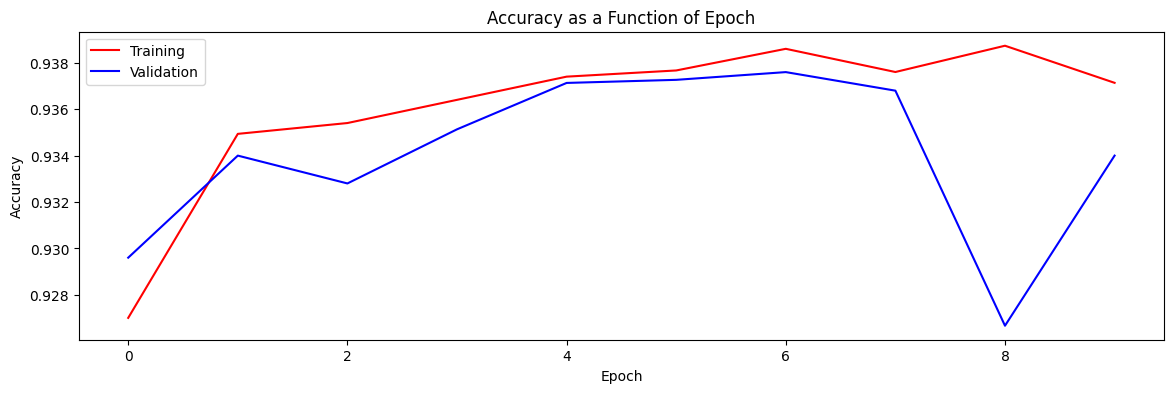

In [305]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

Evaluate the performance of the model on the testing data

In [306]:
# Compute the accuracy of the model on the testing data set using the 'evaluate()' method
performance_test = nn1.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9368 - loss: 0.1954
The loss value of the model on the test data is 0.20418871939182281
The accuracy of the model on the test data is 0.9340000152587891


### Find the optimal parameters using RandomizedSearchCV

Randomized search cross-validation is a technique used for hyperparameter optimization in machine learning models. It is an alternative to grid search, which exhaustively searches through all possible combinations of hyperparameters.

In randomized search cross-validation, instead of trying every combination, a fixed number of random combinations of hyperparameters are sampled from a predefined search space. This approach allows for a more efficient exploration of the hyperparameter space, especially when the search space is large.


You can understand about its implementation [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

In [307]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch
from scipy.stats import randint

def build_model_rs(hp):
    model_rs = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(hp.Choice('hidden1_neurons', [256, 512]), activation=hp.Choice('activation_function', ['relu', 'sigmoid'])),
        Dense(64, activation=hp.Choice('activation_function', ['relu', 'sigmoid'])),
        Dense(1, activation='sigmoid')
    ])
    model_rs.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model_rs


tuner = RandomSearch(build_model_rs,
                      objective='val_accuracy',
                      max_trials=10,
                      executions_per_trial=2,
                      directory='my_dir',
                      project_name='random_search',)


tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Get the best hyperparameters
best_hps_rs = tuner.get_best_hyperparameters(1)[0]

print(f"Best activation function: {best_hps_rs.get('activation_function')}")
print(f"Best number of neurons in hidden layer 1: {best_hps_rs.get('hidden1_neurons')}")


Reloading Tuner from my_dir/random_search/tuner0.json
Best activation function: sigmoid
Best number of neurons in hidden layer 1: 256


In [308]:
#from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import randint

# Define the parameter distribution for randomized search
#parameters_dist = {
    #'activation_function': ['relu', 'sigmoid'],
   # 'hidden1_neurons': randint(256, 513)  # Range of values for hidden1_neurons
#}

# Initialize a basic NN object using the 'KerasClassifier()' method
#base_random_model = KerasClassifier(### CODE HERE ###)

# Perform randomized search using the 'RandomizedSearchCV()' method

# Note: Set the 'estimator' parameter to 'base_random_model' - This specifies the estimator to be used by 'RandomizedSearchCV()'
# Note: Set the 'param_distributions' parameter to 'parameters_dist' - This specifies the parameters to search over
# Note: Set the 'cv' parameter to 2 - This specifies the number of folds in the cross-validation process
# Note: Set the 'n_iter' parameter to 2 - This specifies the number of parameter settings that are sampled
# Note: Set the 'verbose' parameter to 4 - This helps show more relevant information during training
# Note: Set the 'random_state' parameter to 0 - This helps generate the consistent results across multiple runs
#randomized_search = RandomizedSearchCV(### CODE HERE ###)

# Train the model on the training data using the 'fit()' method
# Note: Set the 'epochs' parameter to 10
#randomized_model = randomized_search.fit(### CODE HERE ###)

# Print the optimal values of 'activation_function' and 'hidden1_neurons'
#best_activation_function = randomized_model.best_params_['activation_function']
#best_hidden1_neurons = randomized_model.best_params_['hidden1_neurons']
#best_accuracy = randomized_model.best_score_

#print('\nThe optimal value of activation function is', best_activation_function)
#print('\nThe optimal value of hidden1_neurons is', best_hidden1_neurons)
#print('\nThe accuracy of the model with these optimal parameters is', best_accuracy)


Retrain the model on the optimal set of hyperparameters

In [309]:
# Use the 'create_nn' function to create a NN with the optimal values of 'filter_size' and 'pool_filter_size'
# Note: Set the 'activation_function' parameter to 'best_activation_function' - This specifies the optimal value for the 'activation_function' parameter
# Note: Set the 'hidden1_neurons' parameter to 'best_hidden1_neurons' - This specifies the optimal value for the 'hidden1_neurons' parameter


nn2 = tuner.hypermodel.build(best_hps_rs)

# Capture the training history of the model using the 'fit()' method
# Note: Set the 'validation_data' parameter to (X_val, y_val)
# Note: Use the default batch size or set it to 32
# Note: Set the 'epochs' parameter to 10
nn2.summary()
print('\n')
nn2_history = nn2.fit(X_train, y_train, validation_data= (X_test, y_test), epochs = 10, batch_size=32)
hist = pd.DataFrame(nn2_history.history)
hist['epoch'] = nn2_history.epoch



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 256)                 │          45,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,337 (243.50 KB)

 Trainable params: 62,337 (243.50 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9234 - loss: 0.2428 - val_accuracy: 0.9277 - val_loss: 0.2001
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9319 - loss: 0.2051 - val_accuracy: 0.9343 - val_loss: 0.1960
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9344 - loss: 0.1983 - val_accuracy: 0.9353 - val_loss: 0.2013
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9339 - loss: 0.2055 - val_accuracy: 0.9365 - val_loss: 0.2180
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9366 - loss: 0.1971 - val_accuracy: 0.9331 - val_loss: 0.2189
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9361 - loss: 0.1973 - val_accuracy: 0.9356 - val_loss: 0.1930
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9378 - loss: 0.1990 - val_accuracy: 0.9371 - val_loss: 0.1946
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9367 - loss: 0.2036 - val_accuracy: 

Plot the training and validation accuracies for different values of epoch

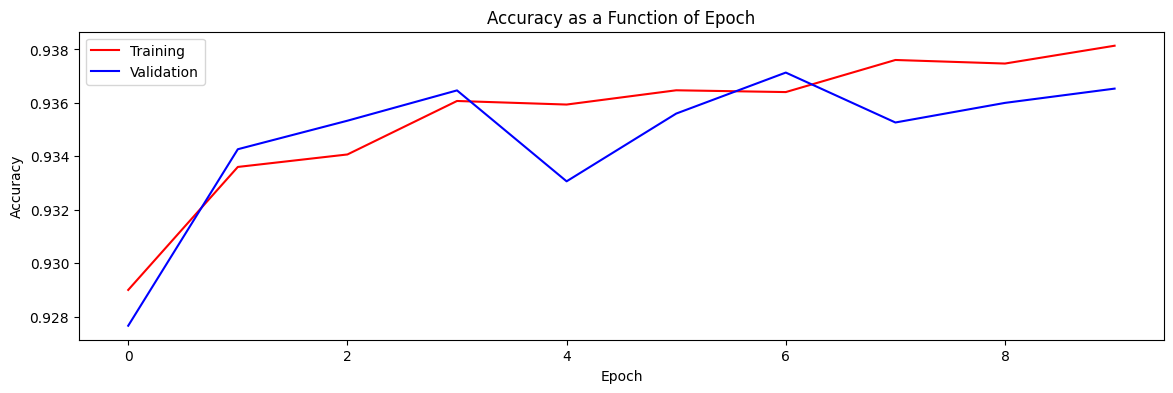

In [310]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

Evaluate the performance of the model on the testing data

In [311]:
# Compute the accuracy of the model on the testing data set using the 'evaluate()' method
performance_test = nn2.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9397 - loss: 0.2011
The loss value of the model on the test data is 0.2079346626996994
The accuracy of the model on the test data is 0.9365333318710327


**Checklist:**
- Importing necessary libraries for machine learning and deep learning
- Preprocessed the data
- Divided the data set into train and test splits
- Handled class imbalance using random undersampling and random oversampling
- Built and evaluated different machine learning models such as logistic regression, decision trees, KNN and random forest models with and without treating class imbalance
- Tuned the best machine learning using GridSearchCV for the optimal hyperparameters
- Built and evaluated a neural network model and tuned for its hyperparameters using GridSearchCV and RandomizedSearchCV

## Task 6: Business Insights: Misclassification Costs
Our first step is to understand the current profitability of the telecomminucation service program, and then to is to estimate the impact of our model. We are going to use misclassification costs to study the impact.

We are going to use \$500 as an approximation company loss for the false negative cost, and \$300 company loss for the false positive cost. Note: We are interested in finding the best cut-off that will maximize the benefit of our machine learning model.


In [312]:
# Define the false positive and false negative missclassification cost here

fn_cost =500
fp_cost =300


#### We will use the optimal model and its corresponding data set that was implemented in the GridSearchCV section. Let's first see the performance metrics of the trained model.

In [313]:
# Use the most optimal machine learning model that you obtained from the GridSearchCV section and the corresponding data set you used (normal, RUS or ROS)

model_name = 'Decision Tree - Random Oversampling'
tree_best = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'], random_state=0)
tree_best.fit(X_train_ros, y_train_ros)

# Evaluating the accuracy of the training and validation sets

tree_best_train_acc = tree_best.score(X_train_ros, y_train_ros)
tree_best_val_acc = tree_best.score(X_test_ros, y_test_ros)

tree_best_train_pred = tree_best.predict(X_train_ros)
tree_best_val_pred = tree_best.predict(X_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = metrics.f1_score(y_test_ros, tree_best_val_pred)
precision = metrics.precision_score(y_test_ros, tree_best_val_pred)
recall = metrics.recall_score(y_test_ros, tree_best_val_pred)


# creating a dataframe to compare the performance of different models
new_model_eval_data = [[model_name, tree_best_train_acc, tree_best_val_acc, f_score, precision, recall]]
new_evaluate_df = pd.DataFrame(new_model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score',
                                          'F1 Score', 'Precision', 'Recall'])

DecisionTreeClassifier(max_depth=35, random_state=0)

In [314]:
new_evaluate_df

Model Name  Training Score  Testing Score  \
0  Decision Tree - Random Oversampling        0.997415       0.972242   

   F1 Score  Precision  Recall  
0  0.972992   0.947405     1.0

#### We now calculate the current misclassification cost in the validation set.

In [315]:
# Obtain the count of false positive and false negative classifications from your model

cm = confusion_matrix(y_test_ros, tree_best_val_pred)

fn_count = cm[0, 1]
fp_count= cm[1, 0]

# Calculate the total misclassification cost using the FN and FP cost and FN and FP count

misclassification_cost = fp_cost * fp_count + fn_cost * fn_count

print('Number of False Positives: %d' % fp_count)
print('Number of False Negatives: %d' % fn_count)
print('Prediction Misclassification Cost: %.2f' % misclassification_cost)

Number of False Positives: 0
Number of False Negatives: 153
Prediction Misclassification Cost: 76500.00


#### We now calculate the misclassification cost as we raise the cut-off value from 0 to 1.

In [316]:
# Predict probabilities for the training set and retain them for only positive outcomes
lr_probs_train = tree_best.predict_proba(X_train_ros)[:, 1]

# Predict probabilities for the validation set and retain them for only positive outcomes
lr_probs_val = tree_best.predict_proba(X_test_ros)[:, 1]

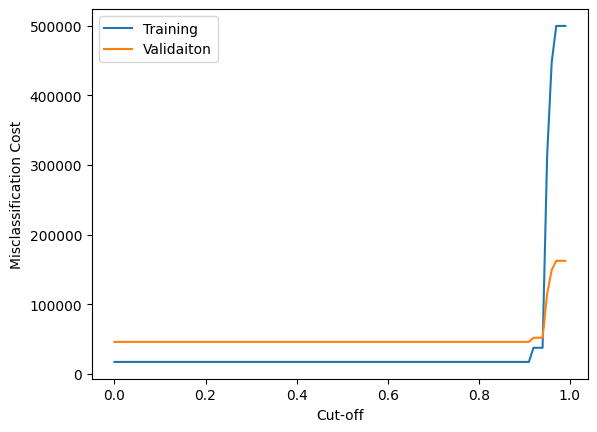

Best Misclassification Cost on the training is 17100.00 at Cut-off 0.000
Applying that cut-off to the validation data results in Misclassification Cost of 45900.00 


In [317]:
# Calculate and store the misclassification costs for different values of cut-off probability
cost_train = []
cost_val=[]

for cutoff in np.arange(0, 1, 0.01):
    # Get the classification predictions using the probabilities obtained for the training data set and the cutoff
    # Get the false positive and false negative count from the predictions
    # Calculate the training misclassification cost and append it to the cost_train array
    curr_preds_train = np.where(lr_probs_train > cutoff, 1,0)
    curr_cf_train = confusion_matrix(y_train_ros, curr_preds_train)
    curr_fp_count_train = curr_cf_train[0, 1]
    curr_fn_count_train = curr_cf_train[1, 0]

    curr_misclassification_cost = curr_fp_count_train * fp_cost + curr_fn_count_train * fn_cost
    cost_train.append(curr_misclassification_cost)

    # Get the classification predictions using the probabilities obtained for the validation data set and the cutoff
    # Get the false positive and false negative count from the predictions
    # Calculate the training misclassification cost and append it to the cost_val array
    curr_preds_val = np.where(lr_probs_val > cutoff, 1, 0)
    curr_cf_val = confusion_matrix(y_test_ros, curr_preds_val)
    curr_fp_count_val = curr_cf_val[0, 1]
    curr_fn_count_val = curr_cf_val[1, 0]

    curr_misclassification_cost = curr_fp_count_val * fp_cost + curr_fn_count_val * fn_cost
    cost_val.append(curr_misclassification_cost)


# Get the X values (cut-off values)
cutoffs = np.arange(0, 1, 0.01)

# Plot misclassification cost against cut-off value
plt.plot(cutoffs,cost_train, label='Training')
plt.plot(cutoffs,cost_val, label='Validaiton')
plt.xlabel('Cut-off')
plt.ylabel('Misclassification Cost')
plt.legend()
plt.show()

# Find the minimum misclassification cost and its associated cut-off value based on the training data
best_cost = min(cost_train)
best_cutoff = cutoffs[cost_train.index(best_cost)]

#apply the cut-off value to the validation data
best_valcost = cost_val[cost_train.index(best_cost)]


print('Best Misclassification Cost on the training is %.2f at Cut-off %.3f' % (best_cost, best_cutoff));
print('Applying that cut-off to the validation data results in Misclassification Cost of %.2f ' % best_valcost);

Checklist:
 - Chose the optimal model and calculated the current misclassification cost in the validation set
 - Calculated the misclassification cost for different values of cut-off value from 0 to 1
 - Found the minimum misclassification cost and its associated best cut-off value based on the training data
 - Applyied the same cut-off to the validation data